In [1]:
from typing import Tuple, List, Union, Any, Optional, Dict, Literal, Callable
import time
import collections
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
from torch import Tensor, tensor
import pandas as pd
import openml

from optuna_kfoldCV import evaluate_dataset_with_model, run_all_openML_with_model
from regression_param_specs import evaluate_Ridge, evaluate_XGBoostRegressor

np.set_printoptions(precision=3, threshold=5) # Print options

# OpenML code

In [ ]:
# Fetch the collection with ID 353
collection = openml.study.get_suite(353)
dataset_ids = collection.data
metadata_list = []

# Fetch and process each dataset
for i, dataset_id in enumerate(dataset_ids):
    dataset = openml.datasets.get_dataset(dataset_id)
    X, y, categorical_indicator, attribute_names = dataset.get_data(
        target=dataset.default_target_attribute
    )

    #count missing values in X
    missing_values_count = X.isnull().sum().sum()
    print(f"Missing values in X: {missing_values_count}")

    X = np.array(X)
    y = np.array(y)[..., None]
    print(X.shape)
    print(y.shape)
    
    # Determine if the dataset has categorical features
    has_categorical = any(categorical_indicator)
    
    # Extract the required metadata
    metadata = {
        'dataset_id': dataset.id,
        'name': dataset.name,
        'n_obs': int(dataset.qualities['NumberOfInstances']),
        'n_features': int(dataset.qualities['NumberOfFeatures']),
        '%_unique_y': len(np.unique(y))/len(y),
        'n_unique_y': len(np.unique(y)),
        'has_categorical': has_categorical,
        'n_missing_values': missing_values_count,
    }
    
    metadata_list.append(metadata)
    print(f" {i+1}/{len(dataset_ids)} Processed dataset {dataset.id}: {dataset.name}")

# Create a DataFrame from the metadata list
df_metadata = pd.DataFrame(metadata_list).sort_values('%_unique_y', ascending=False).set_index("dataset_id").sort_index()
df_metadata.sort_values('%_unique_y', ascending=True)

# Display the metadata DataFrame
df_metadata.loc[44962, "has_categorical"] = True
df_metadata

In [ ]:
from optuna_kfoldCV import np_load_openml_dataset, openML_reg_ids
import numpy as np

for id in openML_reg_ids:
    X,y = np_load_openml_dataset(id, "regression")
    print("id", id, "X", X.shape, "y", y.shape, np.isnan(X).sum(), np.isnan(y).sum())

# for id in df_metadata.index:
#     X,y = np_load_openml_dataset(id, "regression")
#     print("id", id, "X", X.shape, "y", y.shape, np.isnan(X).sum(), np.isnan(y).sum())

# Run experiments (just for testing)

In [ ]:
# !python regression_param_specs.py \
#     --models End2End \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cuda \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
# !python regression_param_specs.py \
#     --models Ridge \
#     --dataset_indices 10 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 100 \
#     --device cuda \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
# !python regression_param_specs.py \
#     --models XGBoostRegressor \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cpu \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
!python regression_param_specs.py \
    --models GradientRFRBoost_upscaleiid \
    --dataset_indices 0 \
    --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
    --n_optuna_trials 2 \
    --device cpu \
    --k_folds 2 \
    --cv_seed 42

In [5]:
!python regression_param_specs.py \
    --models GradientRFRBoost_upscaleiid_iidfeat \
    --dataset_indices 0 \
    --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
    --n_optuna_trials 2 \
    --device cpu \
    --k_folds 2 \
    --cv_seed 42

[I 2024-12-15 13:02:00,386] A new study created in memory with name: no-name-0511a962-106c-4d33-941c-97220f2d26fa
/home/nikita/Code/zephyrox/.conda/lib/python3.10/site-packages/optuna/distributions.py:708: UserWarning: The distribution is specified by [16, 512] and step=32, but the range is not divisible by `step`. It will be replaced by [16, 496].
  warnings.warn(
/home/nikita/Code/zephyrox/.conda/lib/python3.10/site-packages/optuna/distributions.py:693: UserWarning: The distribution is specified by [0.5, 1.00001] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.5, 1.0].
  warnings.warn(
[I 2024-12-15 13:02:00,607] Trial 0 finished with value: 0.25049588084220886 and parameters: {'in_dim': 72, 'out_dim': 1, 'feature_type': 'iid', 'upscale_type': 'iid', 'randfeat_xt_dim': 512, 'randfeat_x0_dim': 512, 'n_layers': 2, 'hidden_dim': 496, 'l2_reg': 0.15702970884055384, 'l2_ghat': 0.0015509913987594303, 'boost_lr': 0.5, 'iid_scale': 0.2051110418843398}. Best 

In [ ]:
# !python regression_param_specs.py \
#     --models GradientRFRBoostID \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cpu \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
# !python regression_param_specs.py \
#     --models GreedyRFRBoostDense \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cpu \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
# !python regression_param_specs.py \
#     --models GreedyRFRBoostDiag \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cpu \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
# !python regression_param_specs.py \
#     --models GreedyRFRBoostScalar \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cpu \
#     --k_folds 2 \
#     --cv_seed 42

In [ ]:
# !python regression_param_specs.py \
#     --models RandomFeatureNetwork \
#     --dataset_indices 0 \
#     --save_dir /home/nikita/Code/random-feature-boosting/save/OpenMLRegression/ \
#     --n_optuna_trials 2 \
#     --device cpu \
#     --k_folds 2 \
#     --cv_seed 42

# join json results

In [1]:
from pydantic.v1.utils import deep_update
import json
import os
import numpy as np
import pandas as pd

from optuna_kfoldCV import openML_reg_ids


def read_json(path):
    with open(path, "r") as f:
        return json.load(f)
    


def custom_deep_update(original, update):
    for key, value in update.items():
        if isinstance(value, dict) and key in original:
            custom_deep_update(original[key], value)
        else:
            original[key] = value



def get_joined_results_json(
        models = ["End2End", "Ridge", "XGBoostRegressor", 
                  "GradientRFRBoost", "GradientRFRBoostID", 
                  "GreedyRFRBoostDense", "GreedyRFRBoostDiag", "GreedyRFRBoostScalar",
                  "RandomFeatureNetwork"],
        datasets = openML_reg_ids,
        save_dir = "/home/nikita/Code/random-feature-boosting/save/OpenMLRegression/",
        ):
    results_json = {}
    for model in models:
        for dataset in datasets:
            path = os.path.join(save_dir, f"regression_{dataset}_{model}.json")
            res = read_json(path)
            if results_json == {}:
                results_json = res
            else:
                custom_deep_update(results_json, res)
    return results_json



def join_jsons_into_array(
        results_json,
        ):
    results = []
    for dataset, dataset_results in results_json.items():
        res = []
        for model_name, model_results in dataset_results.items():
            model_res = np.stack([model_results["score_train"], model_results["score_test"], model_results["t_fit"], model_results["t_inference"]])
            res.append(model_res)
        results.append(res)
    return np.stack(results) # (n_datasets, n_models, 4, n_folds)


def results_to_df(
        models = ["End2End", "Ridge", #"XGBoostRegressor", 
                  #"GradientRFRBoost", "GradientRFRBoostID", 
                  "GradientRFRBoost_upscaleiid",
                  #"GreedyRFRBoostDense", "GreedyRFRBoostDiag", "GreedyRFRBoostScalar",
                  "GreedyRFRBoostDense_upscaleiid", "GreedyRFRBoostDiag_upscaleiid", "GreedyRFRBoostScalar_upscaleiid",
                  #"RandomFeatureNetwork",
                  "RandomFeatureNetwork_iid",
                  "GradientRFRBoost_upscaleiid_iidfeat", "GradientRFRBoostID_iidfeat", 
                  "GreedyRFRBoostDense_upscaleiid_iidfeat", "GreedyRFRBoostDiag_upscaleiid_iidfeat", 
                  "GreedyRFRBoostScalar_upscaleiid_iidfeat",
                  ],
        datasets = openML_reg_ids[:],
        save_dir = "/home/nikita/Code/random-feature-boosting/save/OpenMLRegression/",
        ):
    # Load and join the JSON data
    results_json = get_joined_results_json(models, datasets, save_dir)
    results = join_jsons_into_array(results_json) # (n_datasets, n_models, 4, n_folds)
    
    # Calculate means and stds across folds
    results_mean = np.mean(results, axis=-1)  # (n_datasets, n_models, 4)
    results_std = np.std(results, axis=-1)    # (n_datasets, n_models, 4)
    
    # Create a dictionary to hold both mean and std DataFrames
    metrics = ["score_train", "score_test", "t_fit", "t_inference"]
    metric_dfs = {}
    
    # Initialize DataFrames for both mean and std metrics
    for metric in metrics:
        metric_dfs[metric] = pd.DataFrame(index=datasets, columns=models)
        metric_dfs[f"{metric}_std"] = pd.DataFrame(index=datasets, columns=models)
    
    # Populate the DataFrames for each metric
    for dataset_idx, dataset in enumerate(datasets):
        for model_idx, model in enumerate(models):
            for metric_idx, metric in enumerate(metrics):
                # Set mean value
                metric_dfs[metric].loc[dataset, model] = results_mean[dataset_idx, model_idx, metric_idx]
                # Set* std value
                metric_dfs[f"{metric}_std"].loc[dataset, model] = results_std[dataset_idx, model_idx, metric_idx]
    
    return metric_dfs


In [2]:
for i in range(35):
    for model in ["End2End", "Ridge", #"XGBoostRegressor", 
                  #"GradientRFRBoost", "GradientRFRBoostID", 
                  "GradientRFRBoost_upscaleiid",
                  #"GreedyRFRBoostDense", "GreedyRFRBoostDiag", "GreedyRFRBoostScalar",
                  "GreedyRFRBoostDense_upscaleiid", "GreedyRFRBoostDiag_upscaleiid", "GreedyRFRBoostScalar_upscaleiid",
                  #"RandomFeatureNetwork",
                  "RandomFeatureNetwork_iid",
                  "GradientRFRBoost_upscaleiid_iidfeat", "GradientRFRBoostID_iidfeat", 
                  "GreedyRFRBoostDense_upscaleiid_iidfeat", "GreedyRFRBoostDiag_upscaleiid_iidfeat", 
                  "GreedyRFRBoostScalar_upscaleiid_iidfeat",
                  ]:
        try:
            results = results_to_df(models=[model], datasets=[openML_reg_ids[i]])
            # print(results)
        except:
            print(f"Failed for {model} on {i}, ie {openML_reg_ids[i]}")
            pass

In [19]:
# df = results_to_df(        
#     datasets = openML_reg_ids_noCat[[0,1,2,3,4,5,6,7,8,9,10,     13,14,15,16,17,18,19]],
#     save_dir = "/home/nikita/Code/random-feature-boosting/save/regv2_added40nlayers/OpenMLRegression/",
#     )
df = results_to_df(        
    models = ["End2End", "Ridge", "XGBoostRegressor", 
                  #"GradientRFRBoost", 
                  "GradientRFRBoostID", 
                  "GradientRFRBoost_upscaleiid",
                  #"GreedyRFRBoostDense", "GreedyRFRBoostDiag", "GreedyRFRBoostScalar",
                  "GreedyRFRBoostDense_upscaleiid", "GreedyRFRBoostDiag_upscaleiid", "GreedyRFRBoostScalar_upscaleiid",
                  "RandomFeatureNetwork",
                  #"RandomFeatureNetwork_iid",
                  #"GradientRFRBoost_upscaleiid_iidfeat", "GradientRFRBoostID_iidfeat", 
                  #"GreedyRFRBoostDense_upscaleiid_iidfeat", "GreedyRFRBoostDiag_upscaleiid_iidfeat", 
                  #"GreedyRFRBoostScalar_upscaleiid_iidfeat",
                  ],
    datasets = openML_reg_ids[:],
    save_dir = "/home/nikita/Code/random-feature-boosting/save/OpenMLRegression/",
    )

In [26]:
df["score_test"].mean().sort_values(ascending=True)
# GradientRFRBoost_upscaleiid        0.409032
# End2End                              0.4101
# GreedyRFRBoostDense_upscaleiid     0.411854
# GreedyRFRBoostDiag_upscaleiid       0.43373
# GreedyRFRBoostScalar_upscaleiid    0.456377
# RandomFeatureNetwork_iid           0.494089
# Ridge                              0.529513
# dtype: object

XGBoostRegressor                   0.376724
GradientRFRBoost_upscaleiid        0.406634
GreedyRFRBoostDense_upscaleiid     0.406752
End2End                            0.408549
GradientRFRBoostID                 0.414776
GreedyRFRBoostDiag_upscaleiid      0.419525
RandomFeatureNetwork                0.45485
GreedyRFRBoostScalar_upscaleiid    0.456847
Ridge                              0.529513
dtype: object

In [27]:
df["score_train"].mean().sort_values(ascending=True)

XGBoostRegressor                   0.192556
End2End                            0.302885
GradientRFRBoost_upscaleiid        0.348738
GreedyRFRBoostDense_upscaleiid     0.350501
GradientRFRBoostID                 0.359632
GreedyRFRBoostDiag_upscaleiid      0.368096
GreedyRFRBoostScalar_upscaleiid    0.418683
RandomFeatureNetwork               0.430798
Ridge                              0.522192
dtype: object

In [23]:
df["score_test"].rank(axis=1).mean().sort_values()
# GradientRFRBoost_upscaleiid        2.400000
# GreedyRFRBoostDense_upscaleiid     2.400000
# End2End                            3.542857
# GreedyRFRBoostDiag_upscaleiid      3.685714
# GreedyRFRBoostScalar_upscaleiid    4.657143
# RandomFeatureNetwork_iid           5.371429
# Ridge                              5.942857
# dtype: float64

XGBoostRegressor                   2.400000
GreedyRFRBoostDense_upscaleiid     3.342857
GradientRFRBoost_upscaleiid        3.371429
GreedyRFRBoostDiag_upscaleiid      4.885714
GradientRFRBoostID                 4.971429
End2End                            5.057143
RandomFeatureNetwork               6.457143
GreedyRFRBoostScalar_upscaleiid    6.771429
Ridge                              7.742857
dtype: float64

In [24]:
#number of first places
(df["score_test"].rank(axis=1) == 1).sum().sort_values()
# GreedyRFRBoostScalar_upscaleiid     0
# RandomFeatureNetwork_iid            1
# GreedyRFRBoostDiag_upscaleiid       2
# Ridge                               5
# GreedyRFRBoostDense_upscaleiid      6
# End2End                             9
# GradientRFRBoost_upscaleiid        12
# dtype: int64

GradientRFRBoostID                  0
GreedyRFRBoostDense_upscaleiid      0
GreedyRFRBoostScalar_upscaleiid     0
GreedyRFRBoostDiag_upscaleiid       1
End2End                             2
RandomFeatureNetwork                2
Ridge                               3
GradientRFRBoost_upscaleiid         5
XGBoostRegressor                   22
dtype: int64

In [23]:
# df2 = results_to_df(        
#     datasets = openML_reg_ids_noCat[[0,1,2  ,4,5,6,7,8,9,10,     13,14,15,16,17,18,19]],
#     save_dir = "/home/nikita/Code/random-feature-boosting/save/regv2_added40nlayers/OpenMLRegression/",
#     )

In [ ]:
# df2["score_test"].mean().sort_values(ascending=True)

In [ ]:
# df2["score_train"].mean().sort_values(ascending=True)

In [ ]:
# df2["score_test"].rank(axis=1).mean().sort_values()

In [ ]:
#number of first places
# (df2["score_test"].rank(axis=1) == 1).sum().sort_values()

In [ ]:
# XGBoostRegressor       0.389427
# End2End                0.408184
# GreedyRFBoostDense      0.43249
# GradientRFBoost        0.434696
# GradientRFBoostID      0.436364
# GreedyRFBoostDiag      0.445675
# GreedyRFBoostScalar    0.528314
# Ridge                  0.606384
# RidgeCV                0.606385
# dtype: object


# XGBoostRegressor       0.170585
# End2End                0.345058
# GreedyRFBoostDense     0.387421
# GradientRFBoost        0.400575
# GradientRFBoostID      0.405132
# GreedyRFBoostDiag       0.41455
# GreedyRFBoostScalar    0.510962
# RidgeCV                0.600331
# Ridge                   0.60034
# dtype: object


# XGBoostRegressor       2.666667
# End2End                3.333333
# GreedyRFBoostDense     3.500000
# GradientRFBoost        3.611111
# GradientRFBoostID      4.111111
# GreedyRFBoostDiag      4.777778
# GreedyRFBoostScalar    6.722222
# Ridge                  8.055556
# RidgeCV                8.222222
# dtype: float64


# Ridge                   0
# RidgeCV                 0
# GradientRFBoostID       0
# GreedyRFBoostScalar     0
# GradientRFBoost         1
# GreedyRFBoostDense      1
# GreedyRFBoostDiag       1
# End2End                 4
# XGBoostRegressor       11
# dtype: int64

# Look at small datasets

In [16]:
less5000 = df_metadata.query("n_obs < 5000").index
less1000 = df_metadata.query("n_obs < 1000").index
less5000

NameError: name 'df_metadata' is not defined

In [ ]:
df["score_test"].loc[less5000].mean().sort_values(ascending=True)

In [ ]:
df["score_test"].loc[less5000].rank(axis=1).mean().sort_values(ascending=True)

In [ ]:
df["score_test"].loc[less5000].rank(axis=1)

In [ ]:
df["score_test"].loc[less1000]

# Look at distribution of params

Model: End2End


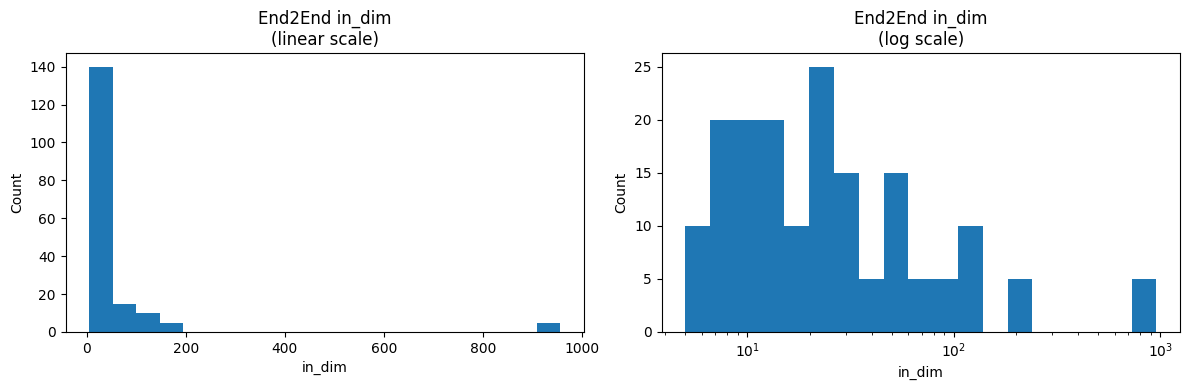

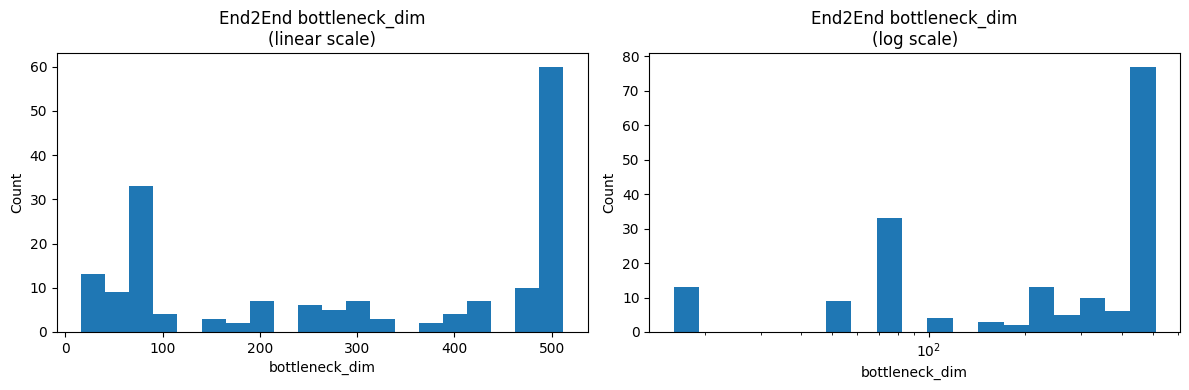

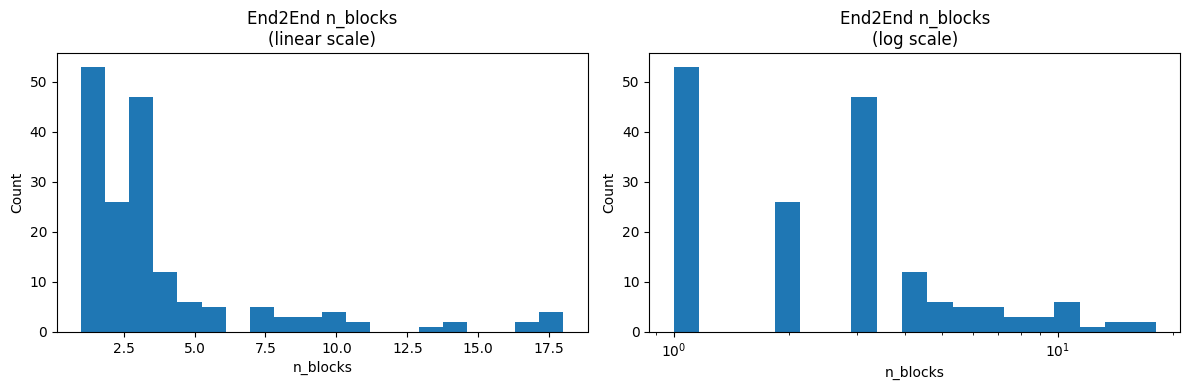

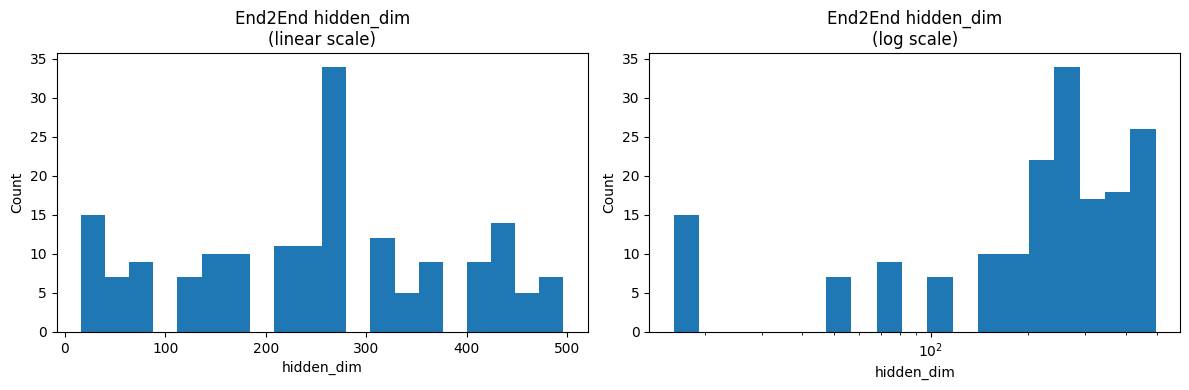

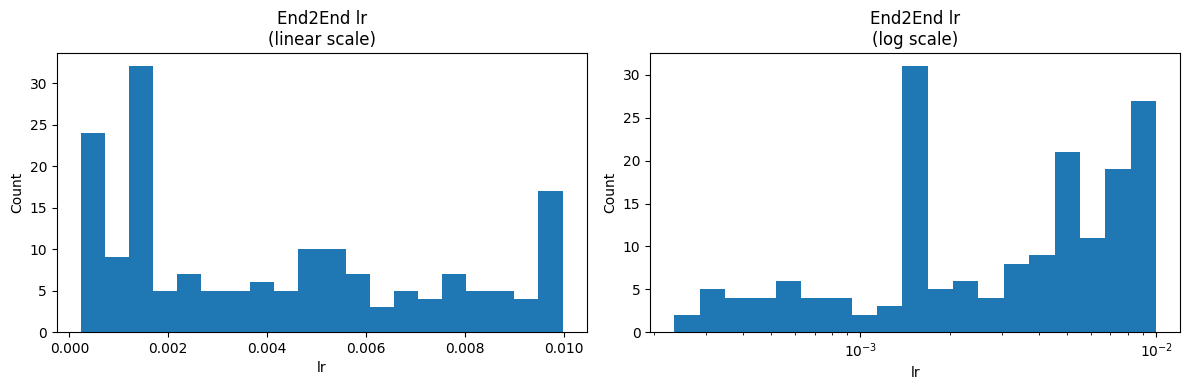

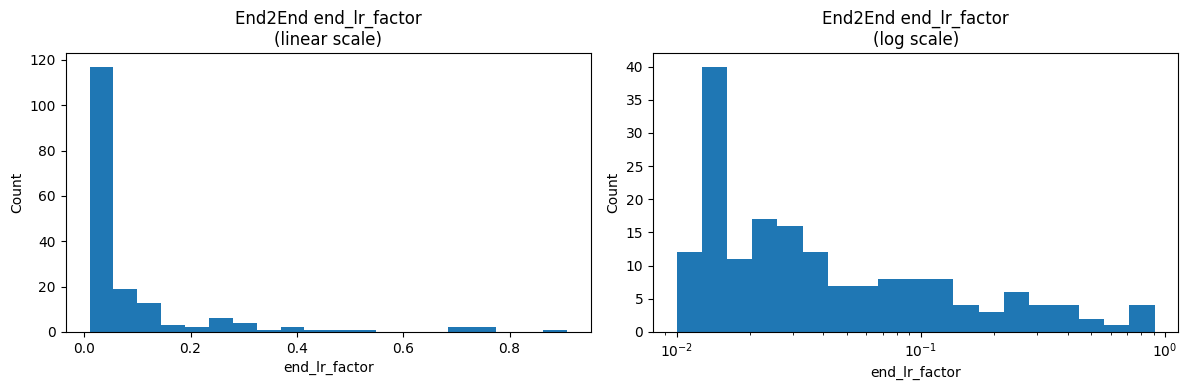

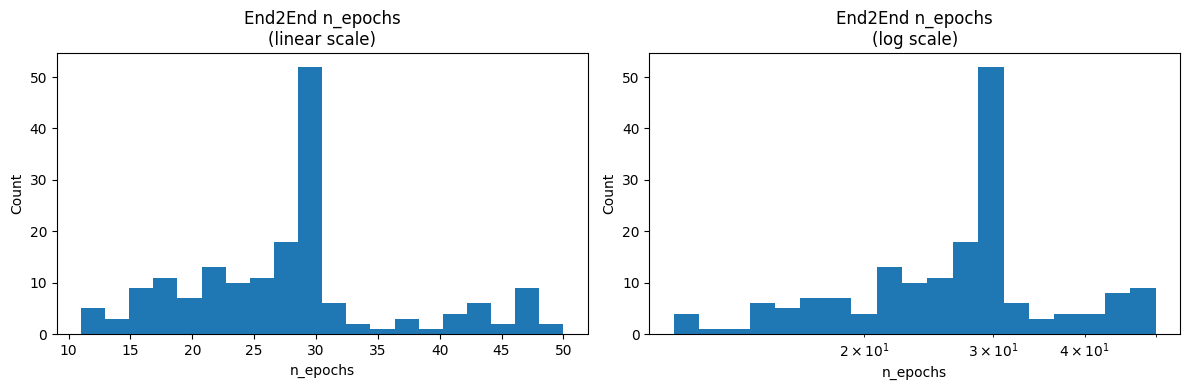

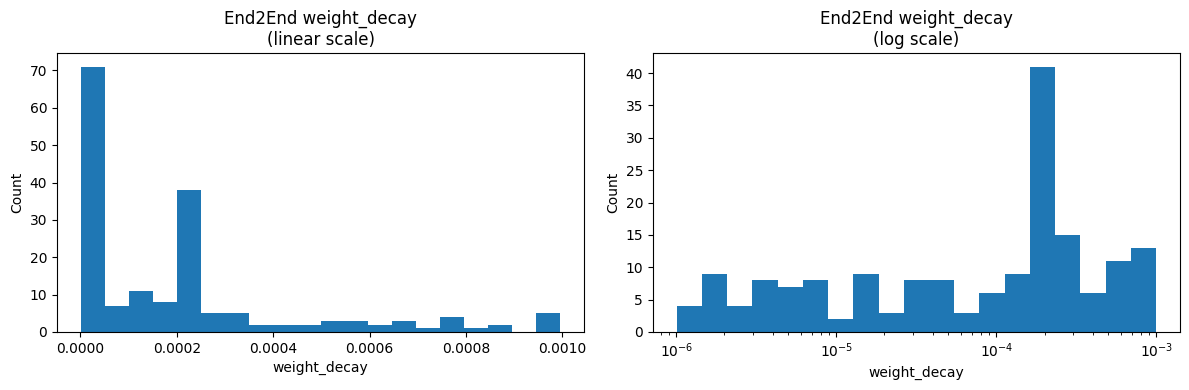

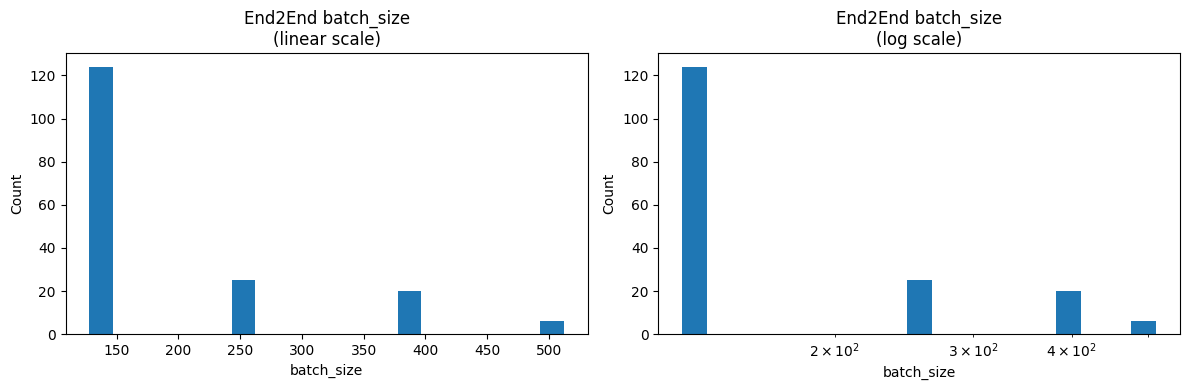

Model: Ridge


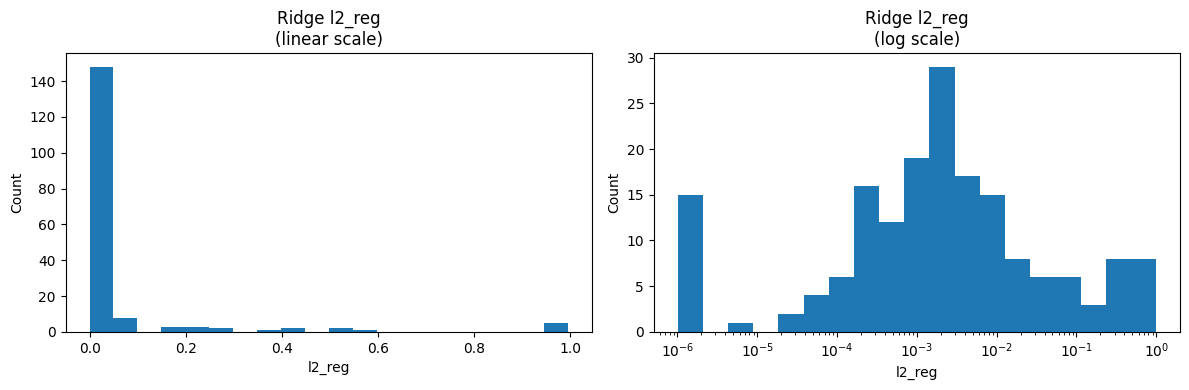

Model: XGBoostRegressor


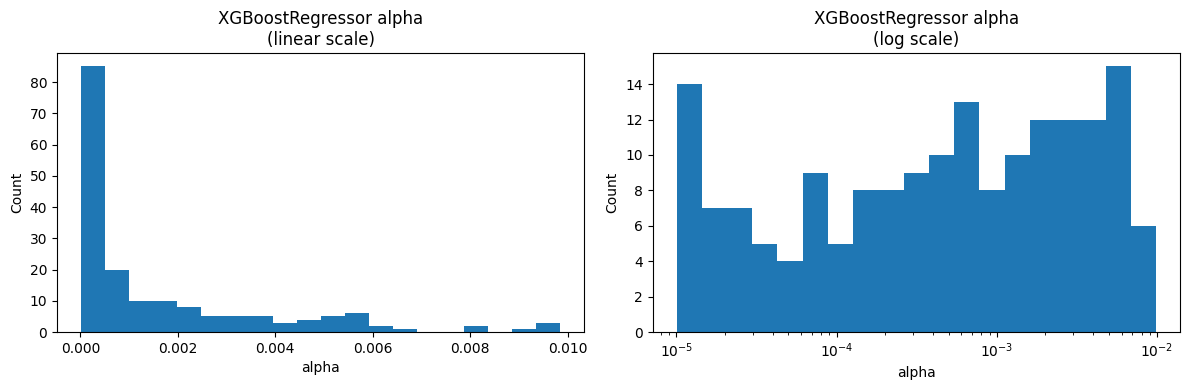

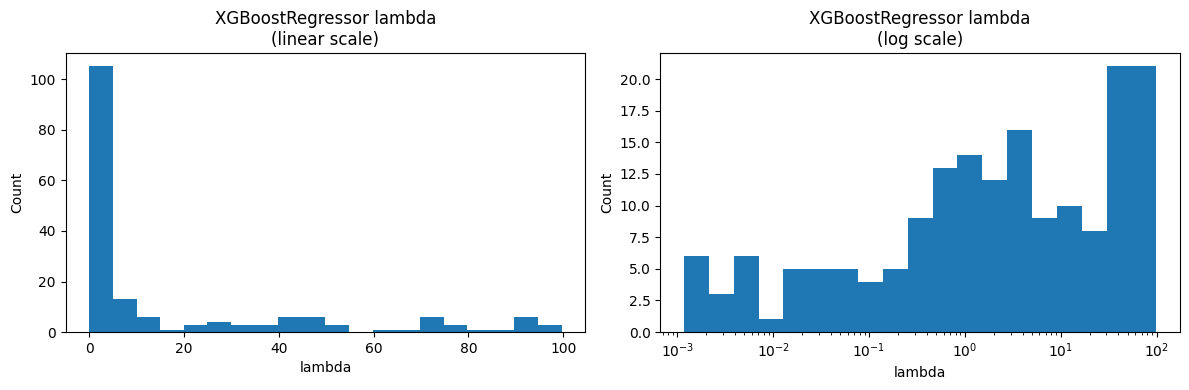

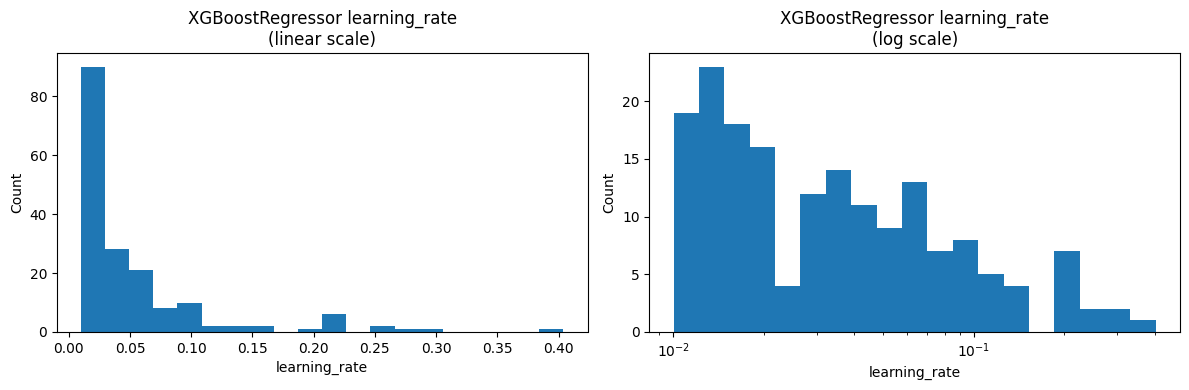

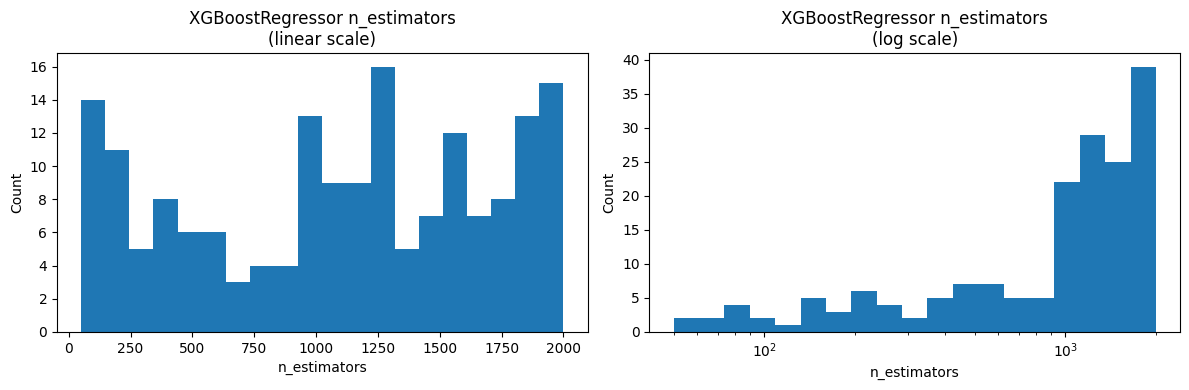

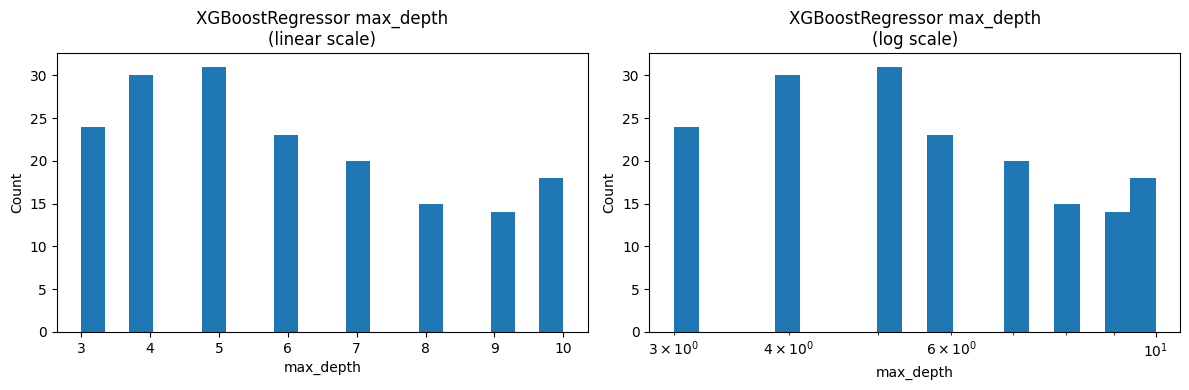

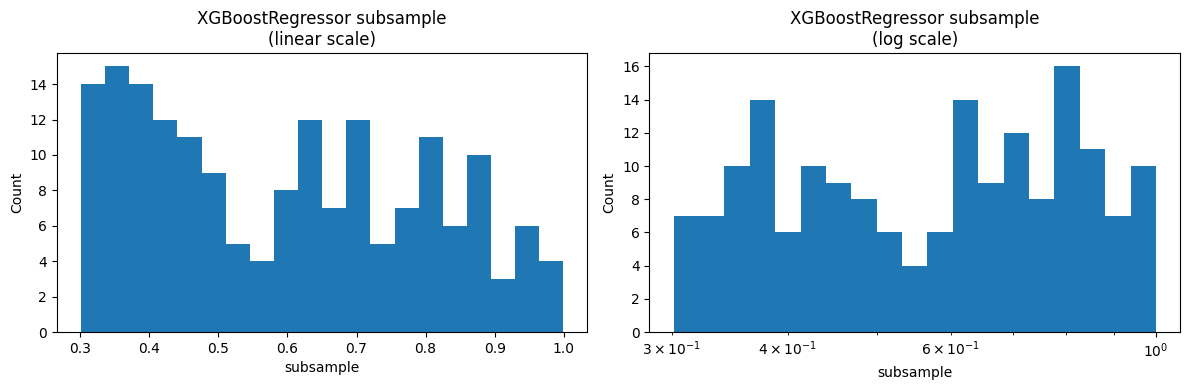

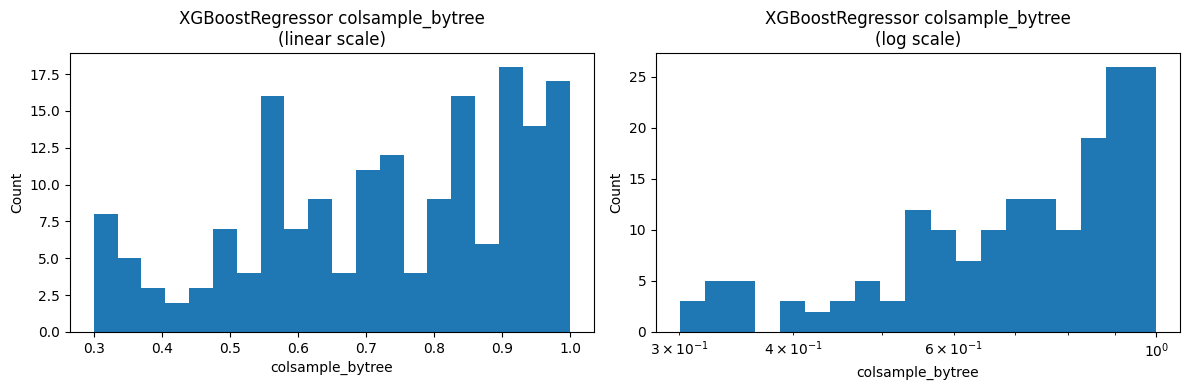

Model: GradientRFRBoostID


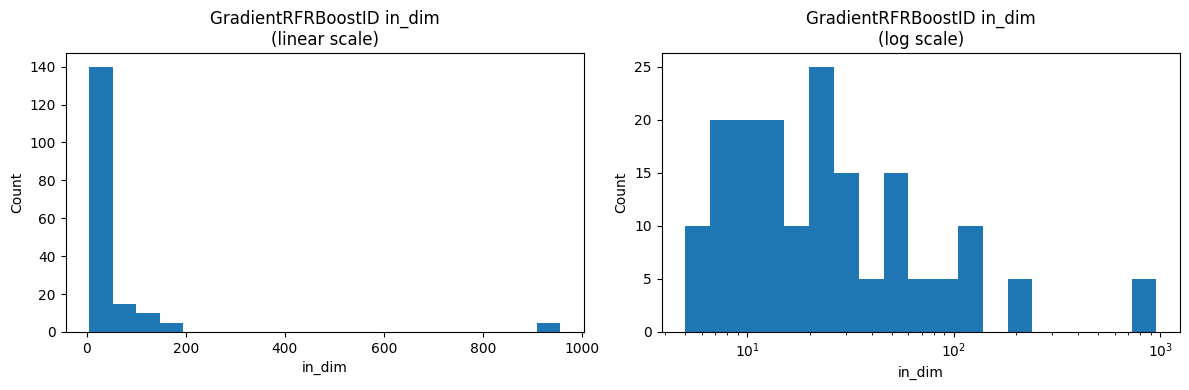

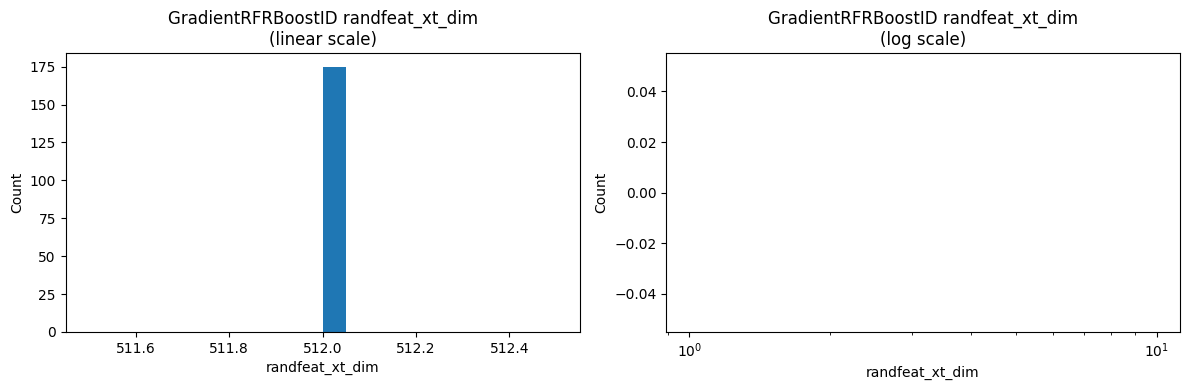

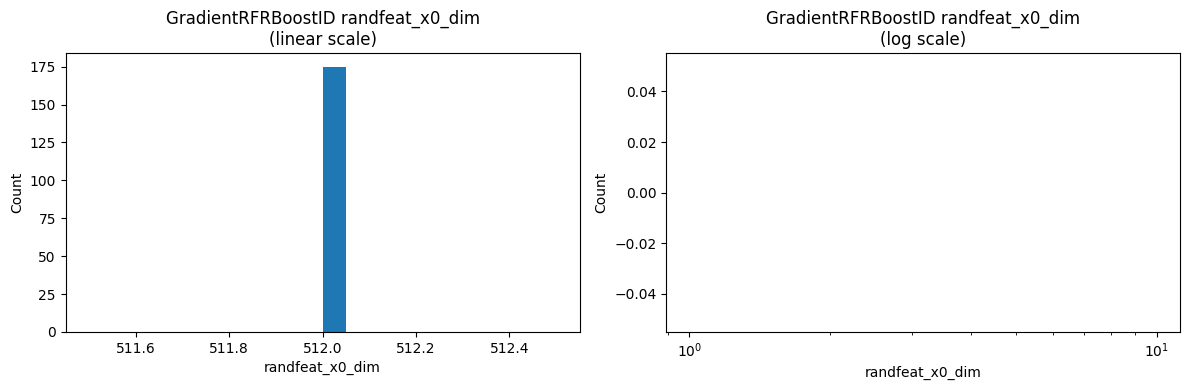

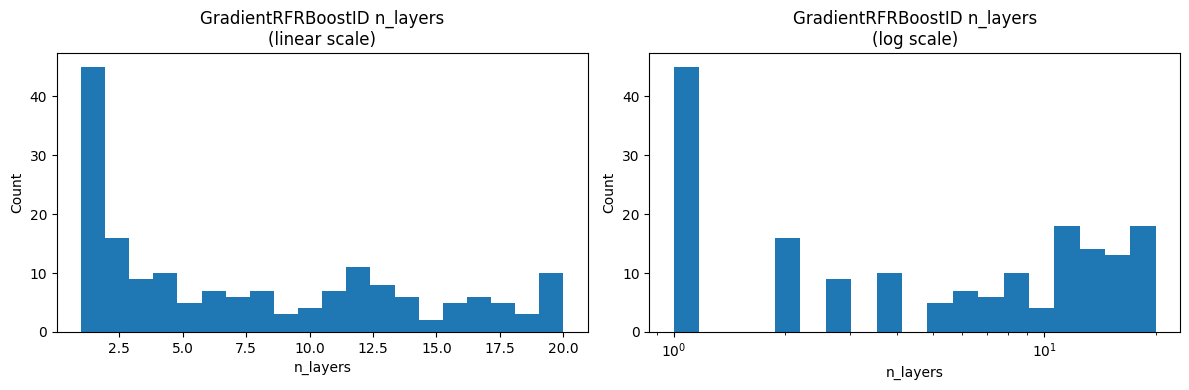

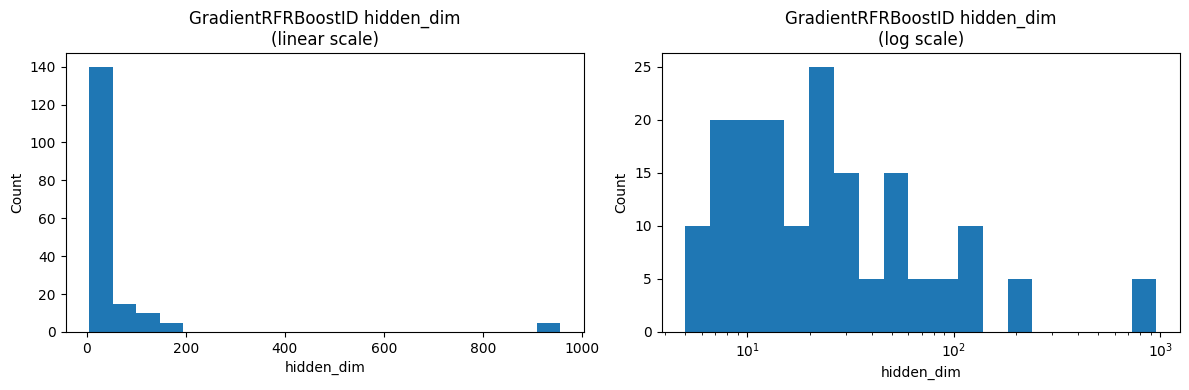

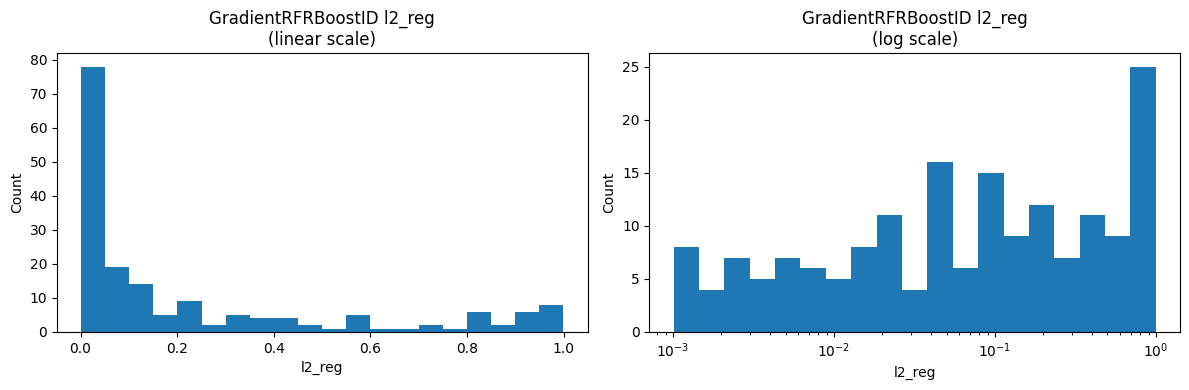

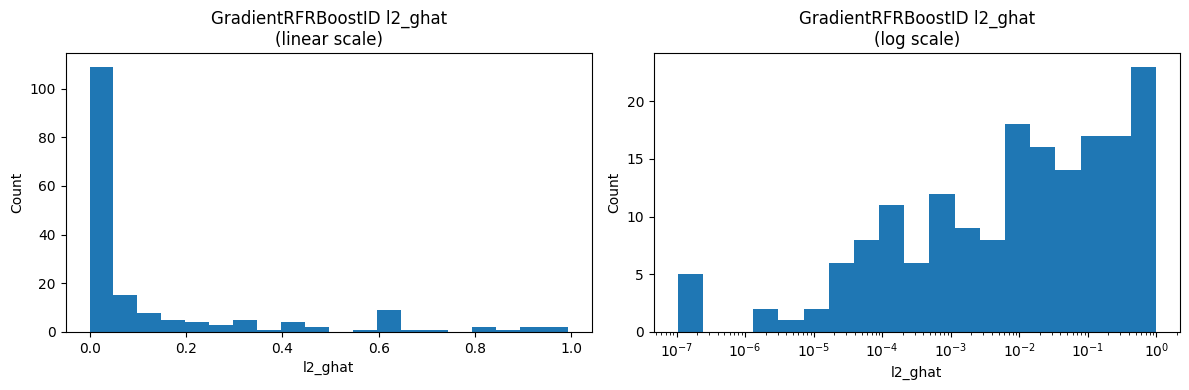

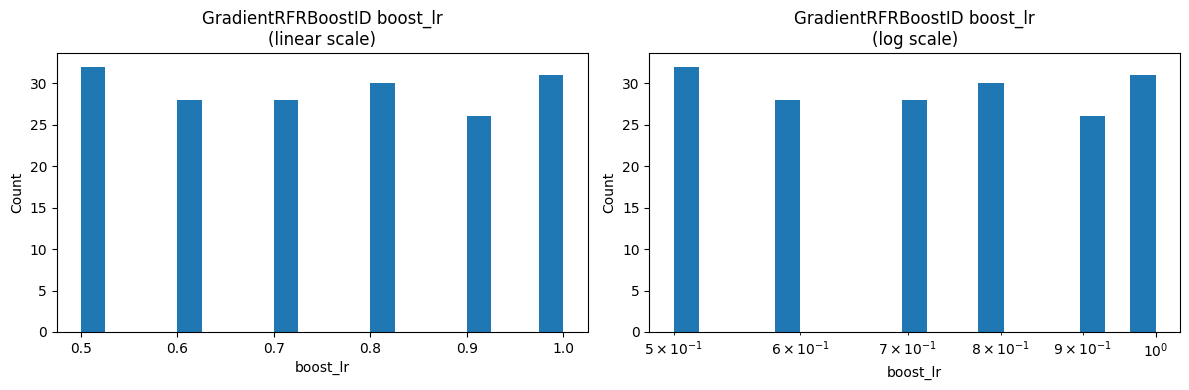

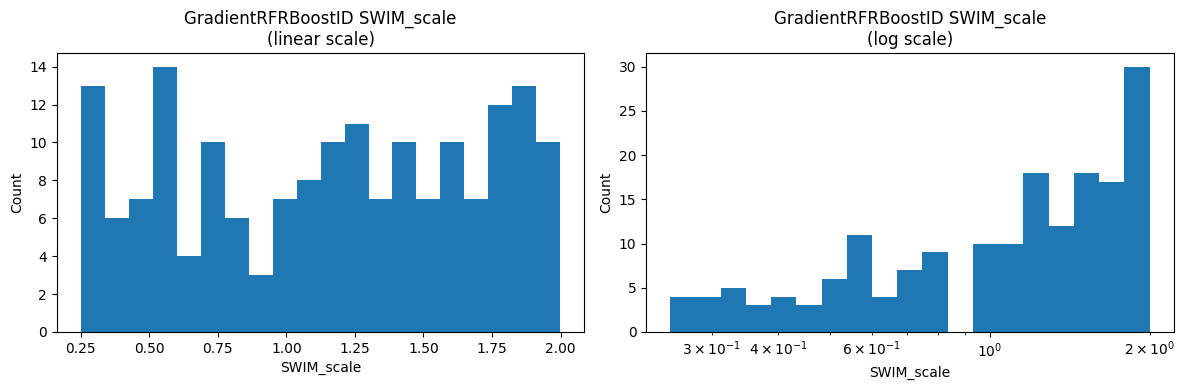

Model: GradientRFRBoost_upscaleiid


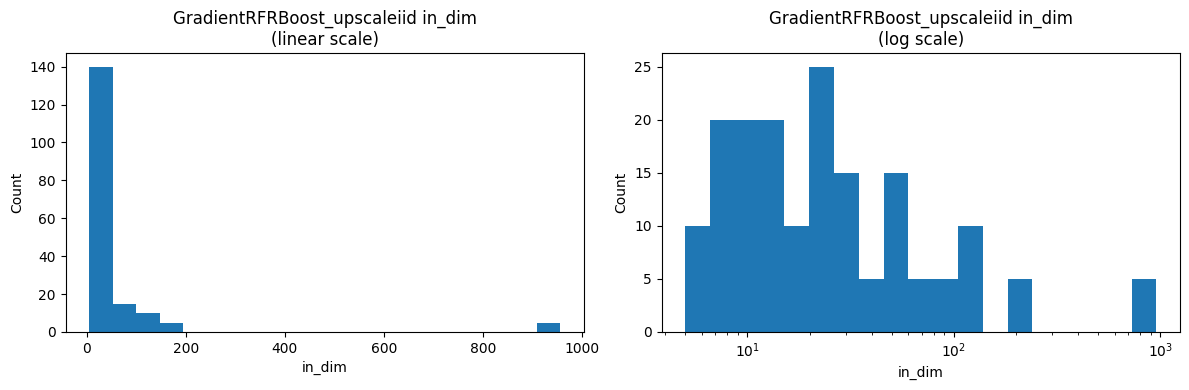

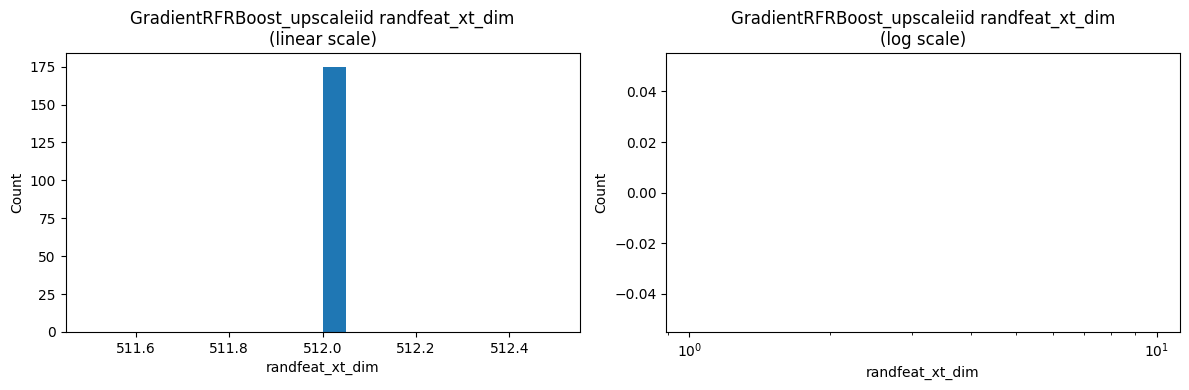

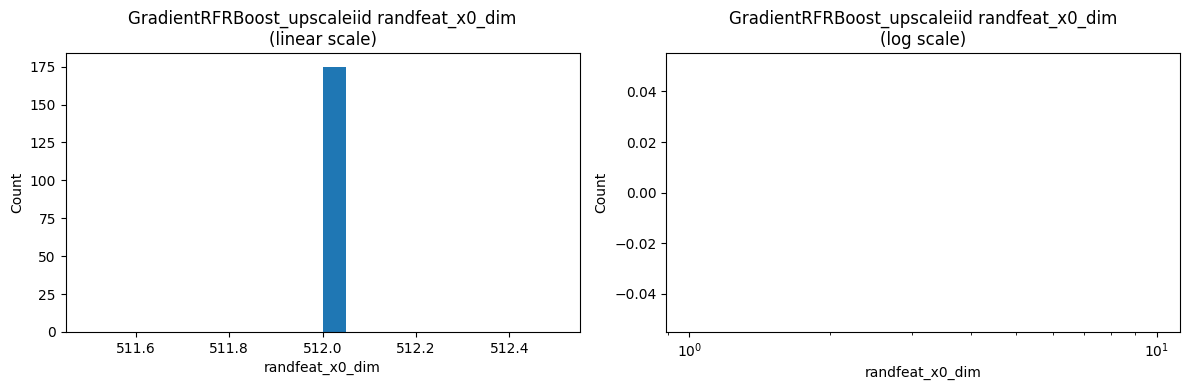

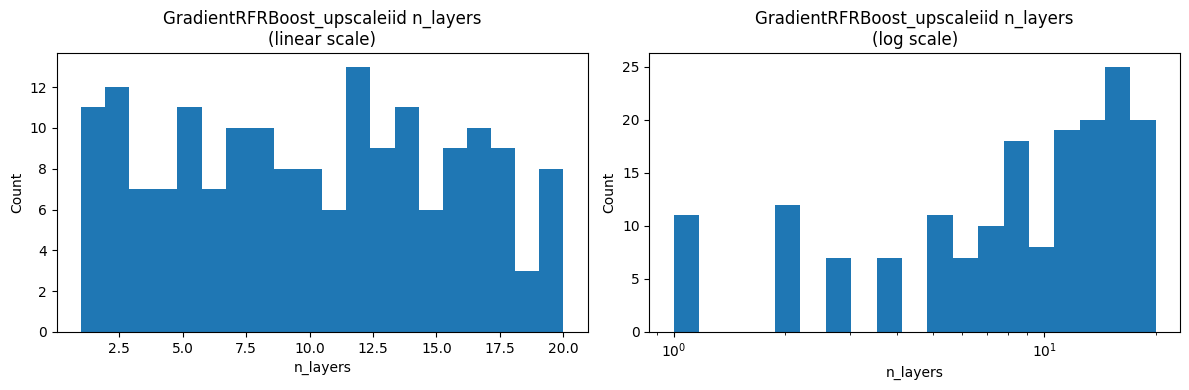

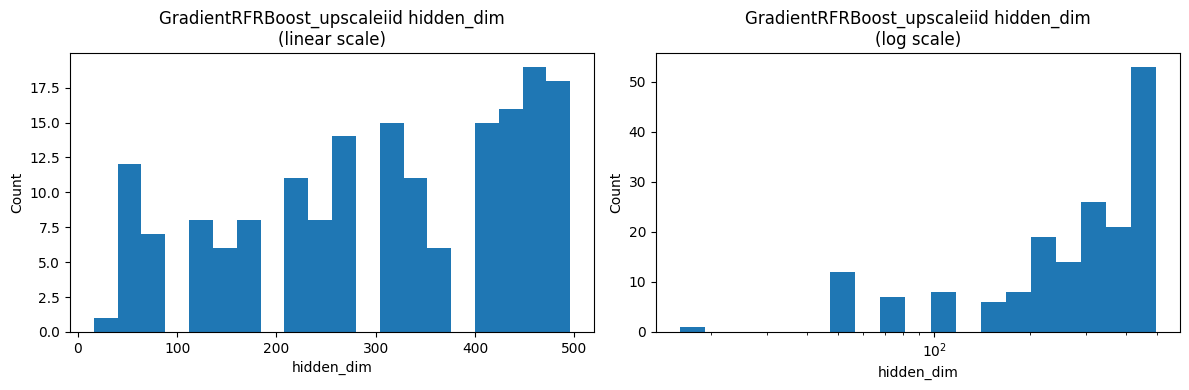

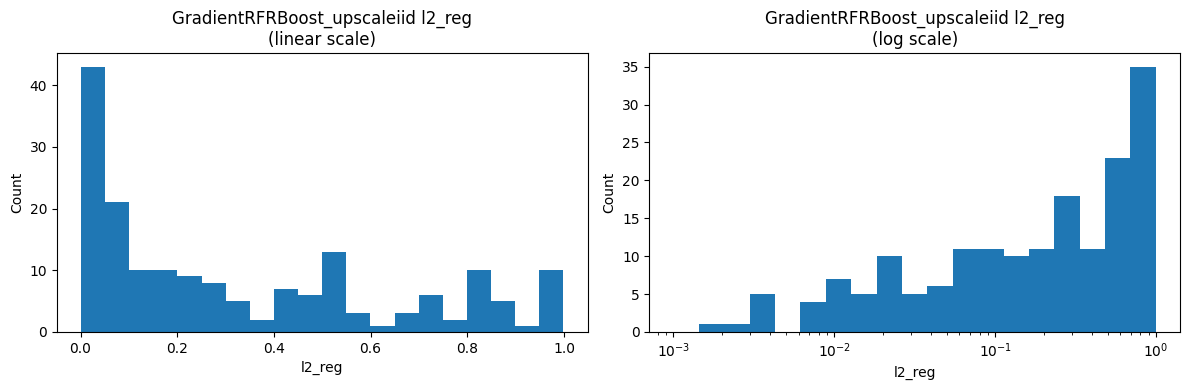

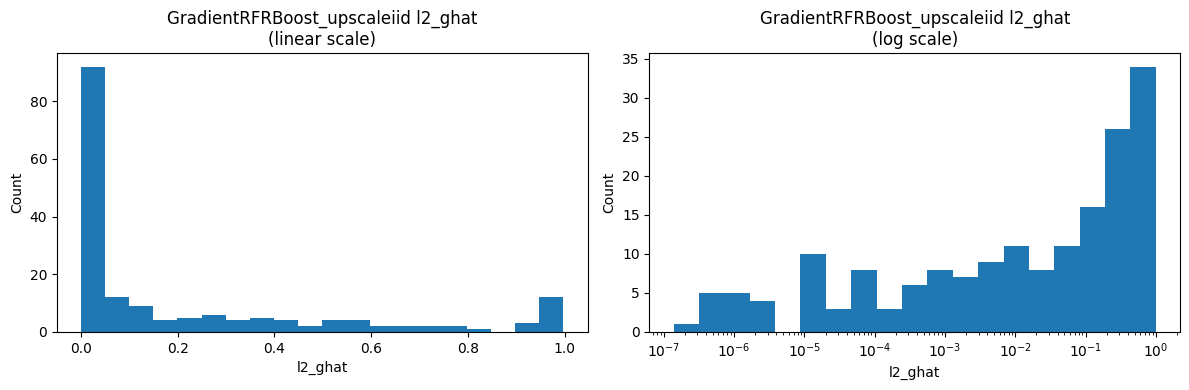

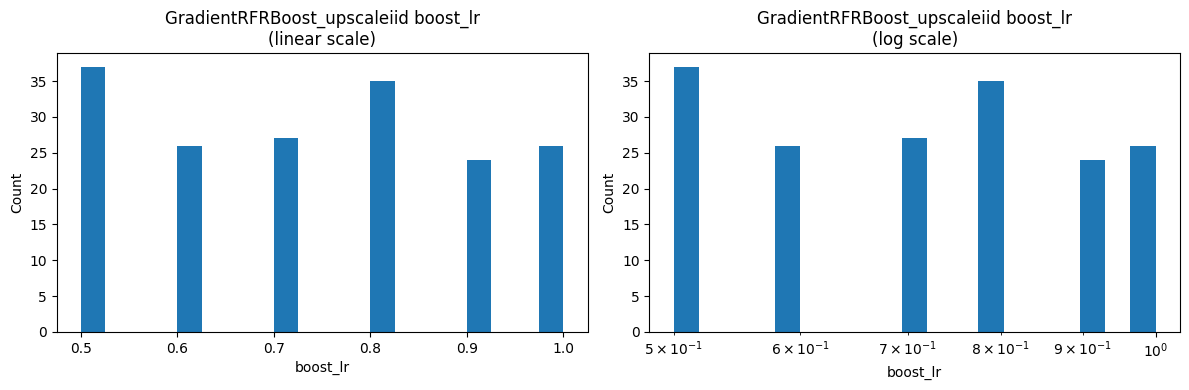

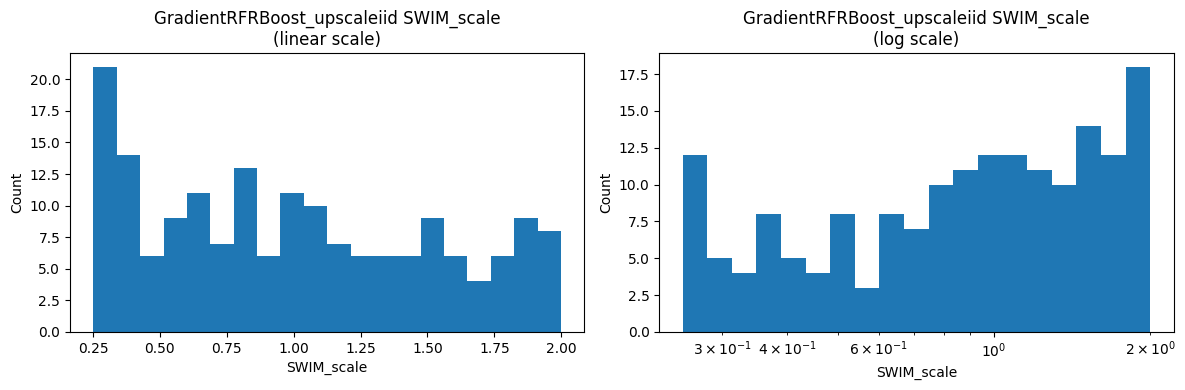

Model: GreedyRFRBoostDense_upscaleiid


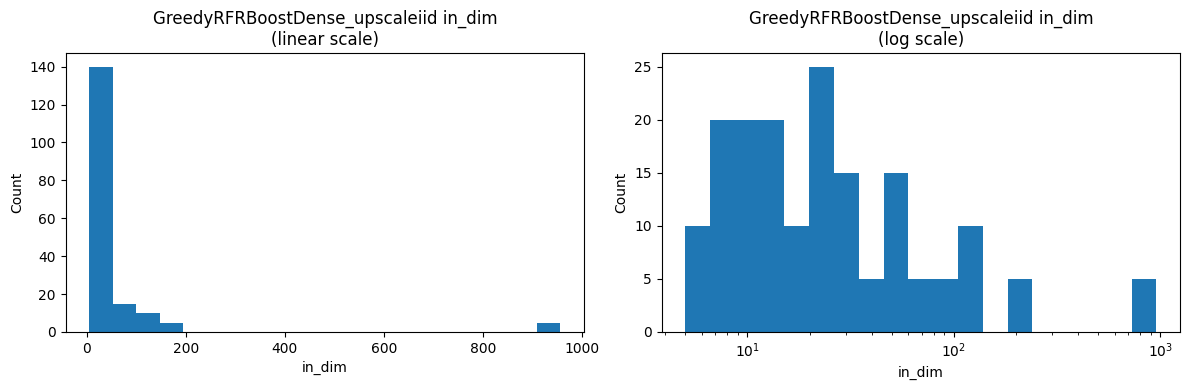

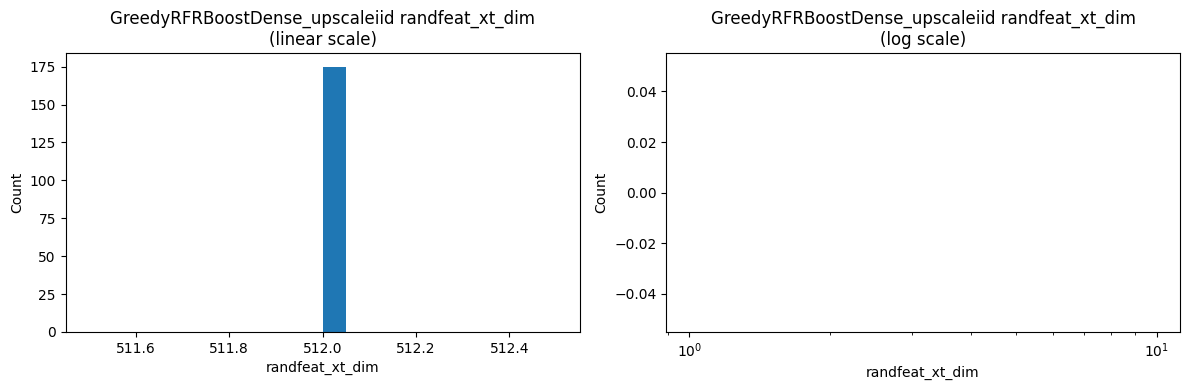

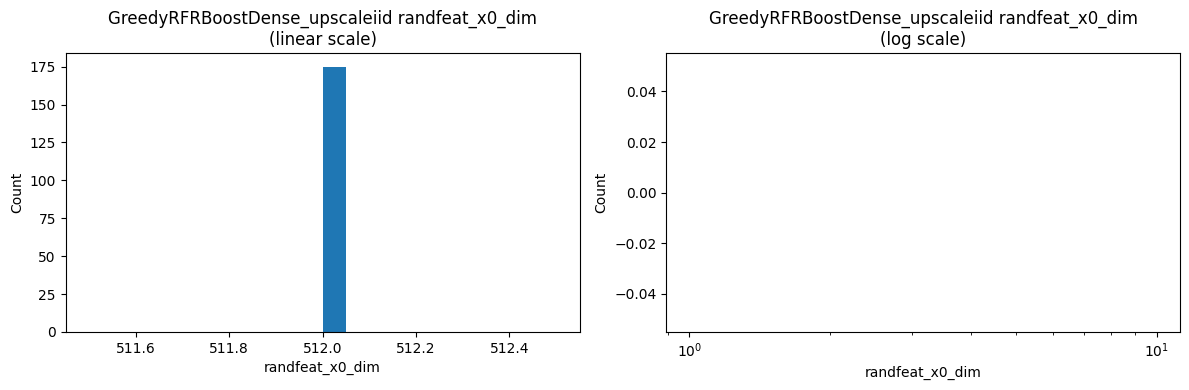

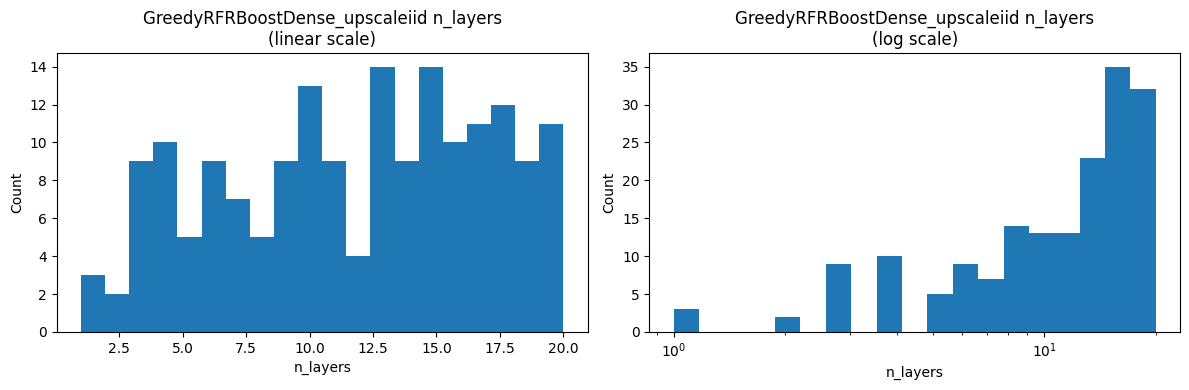

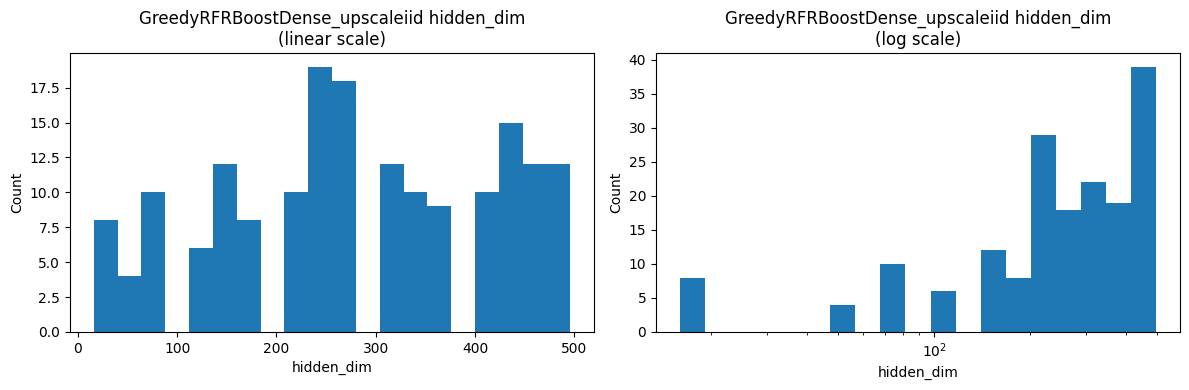

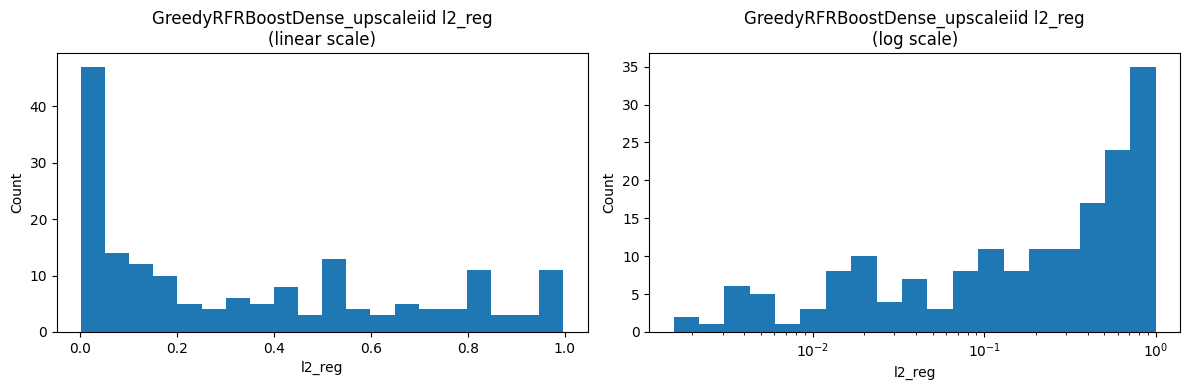

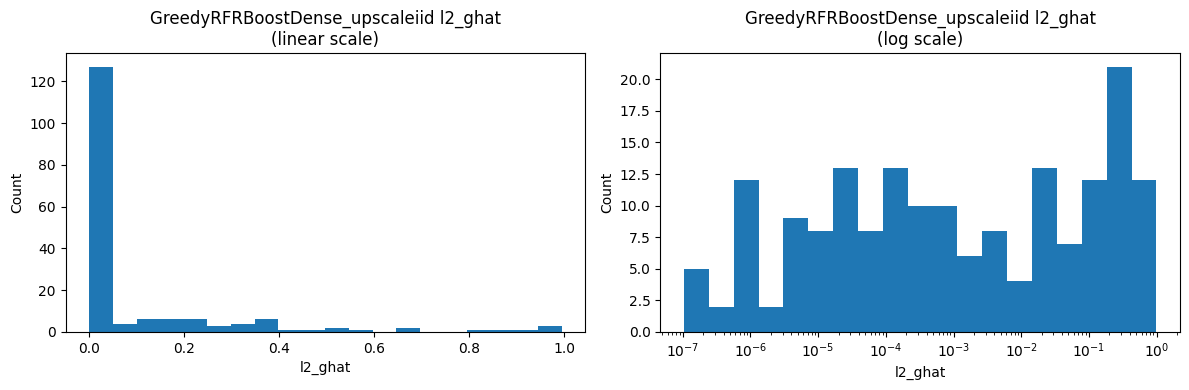

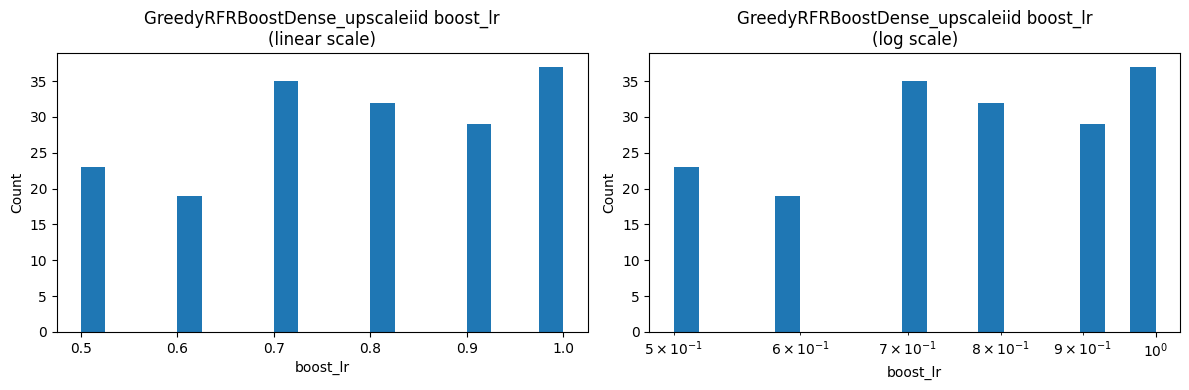

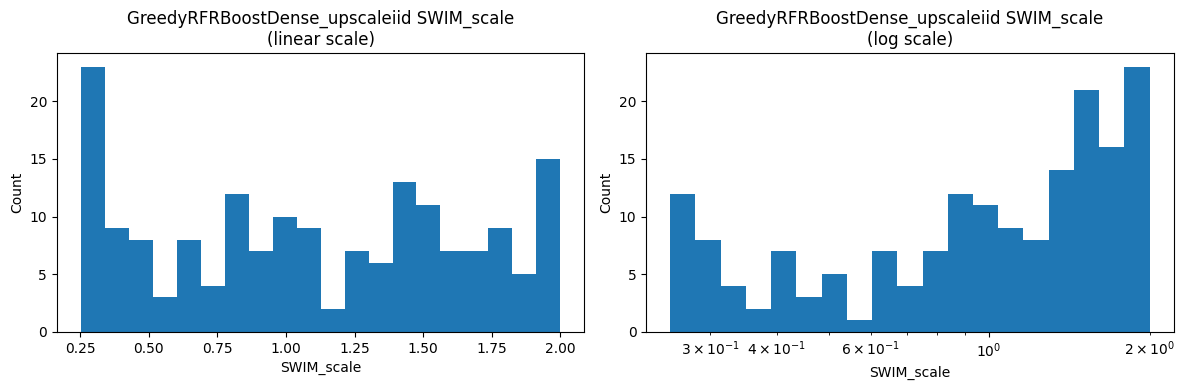

Model: GreedyRFRBoostDiag_upscaleiid


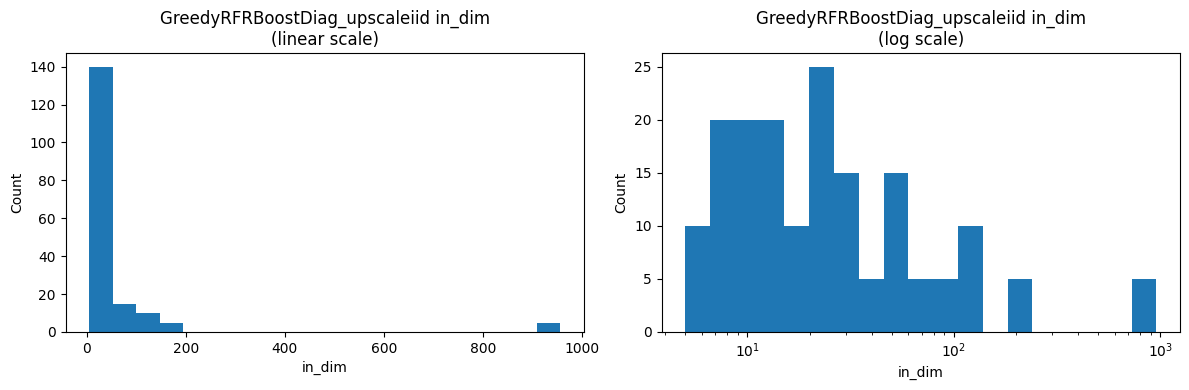

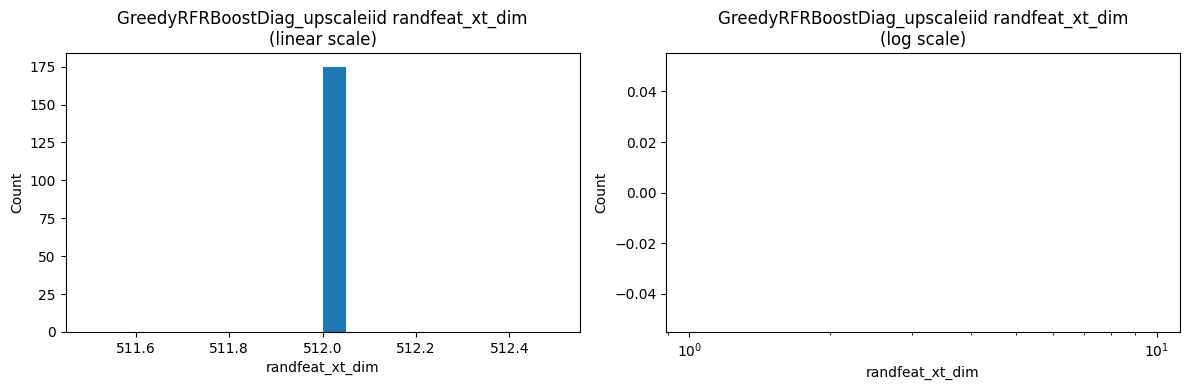

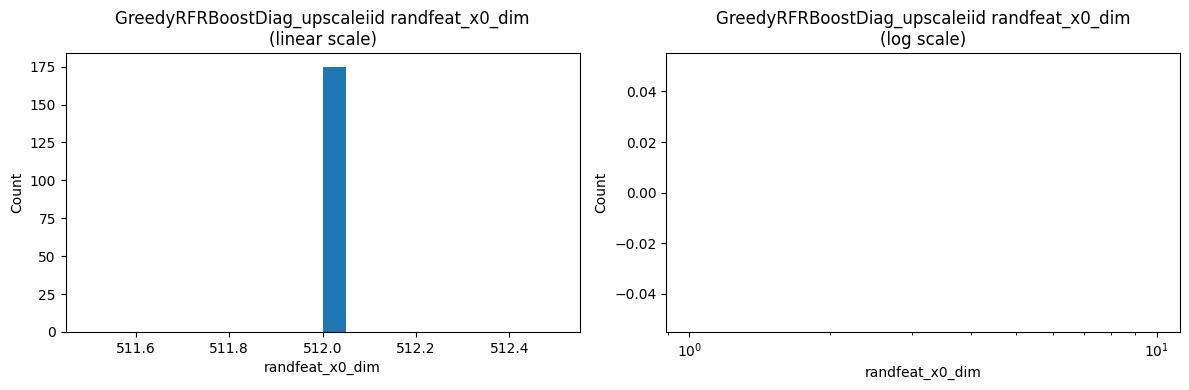

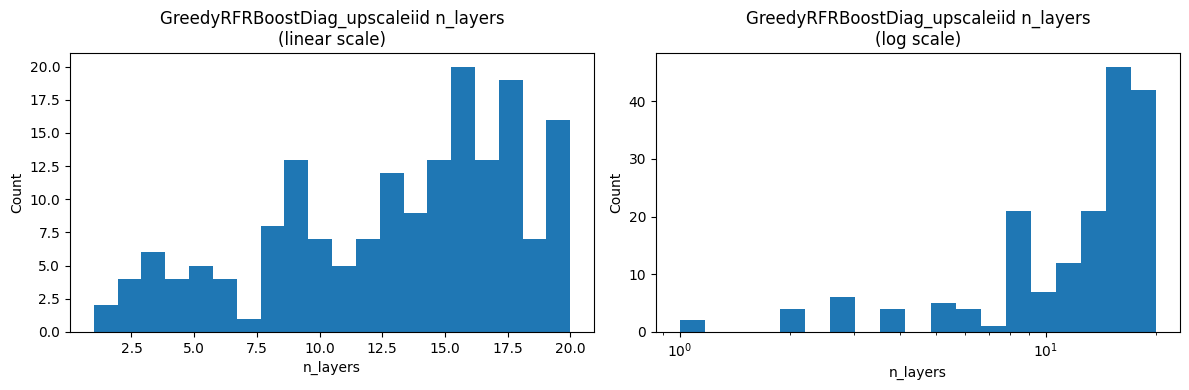

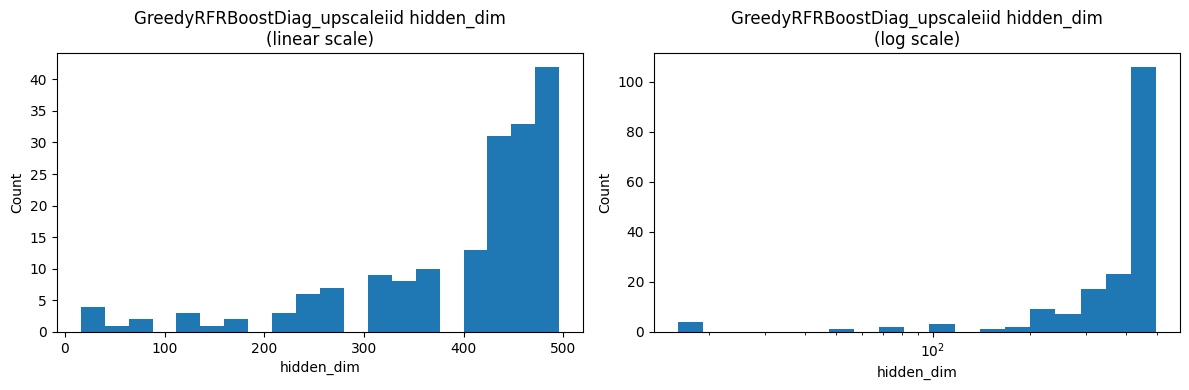

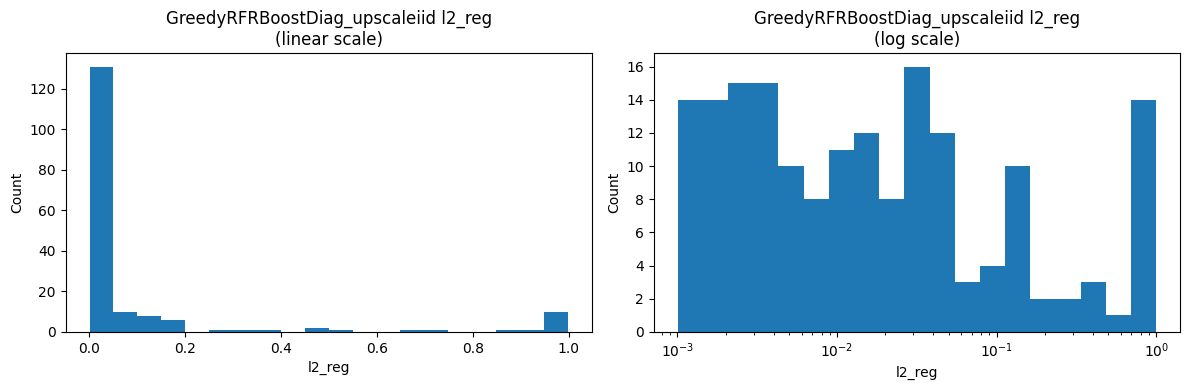

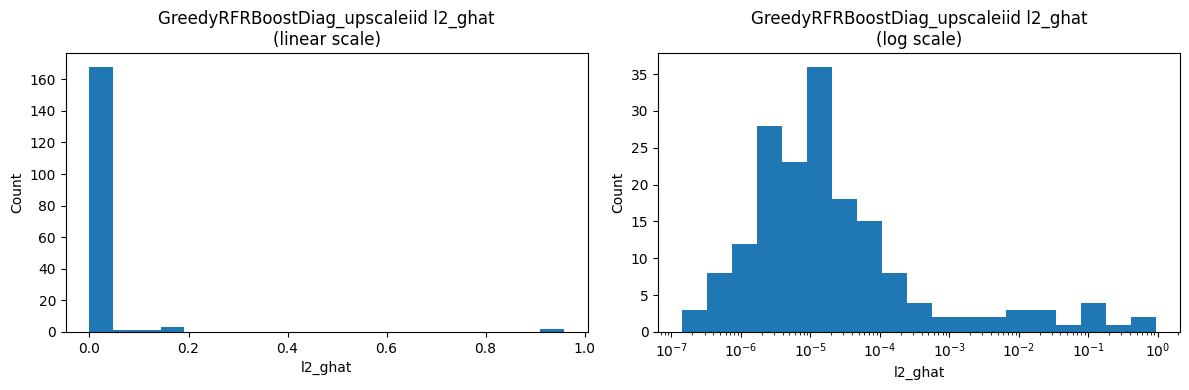

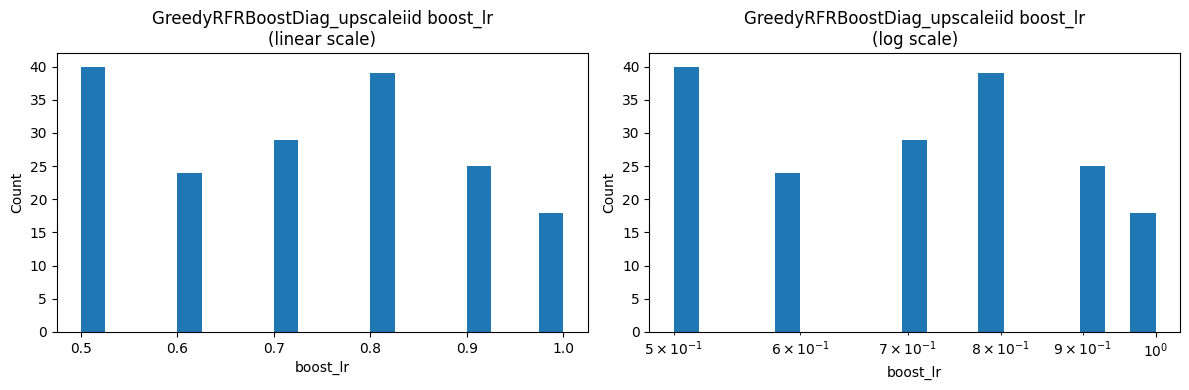

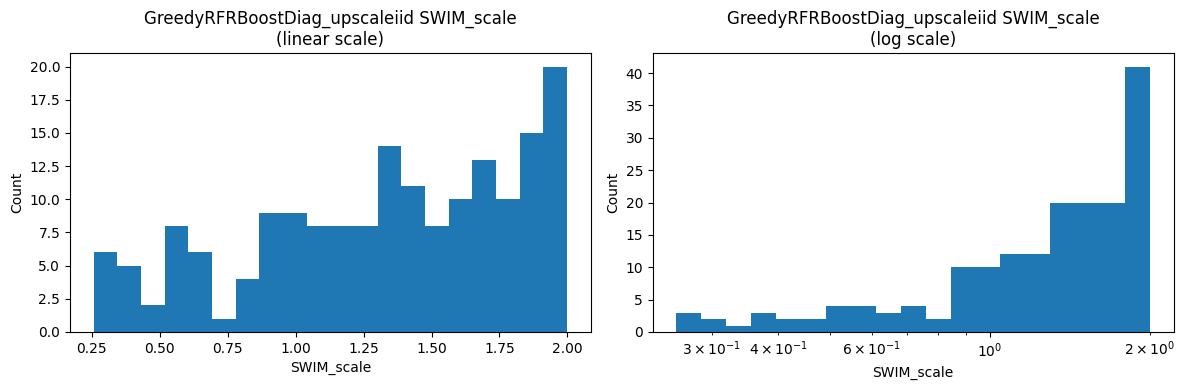

Model: GreedyRFRBoostScalar_upscaleiid


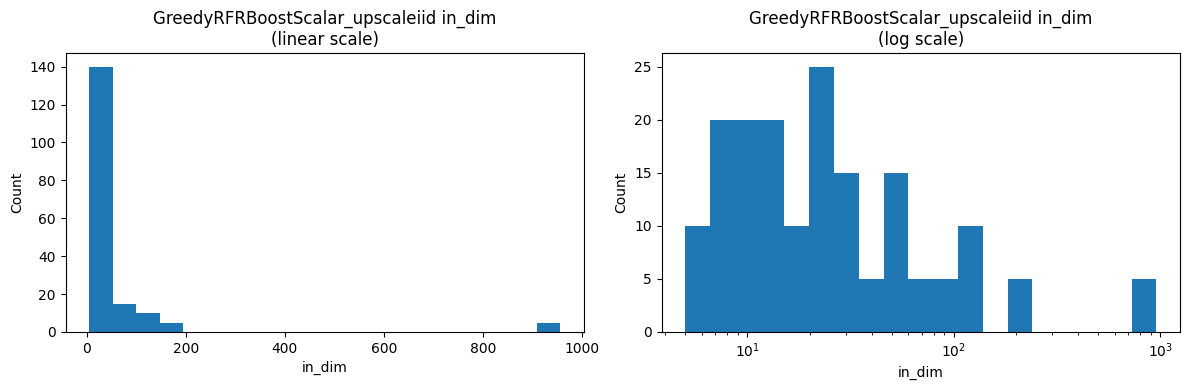

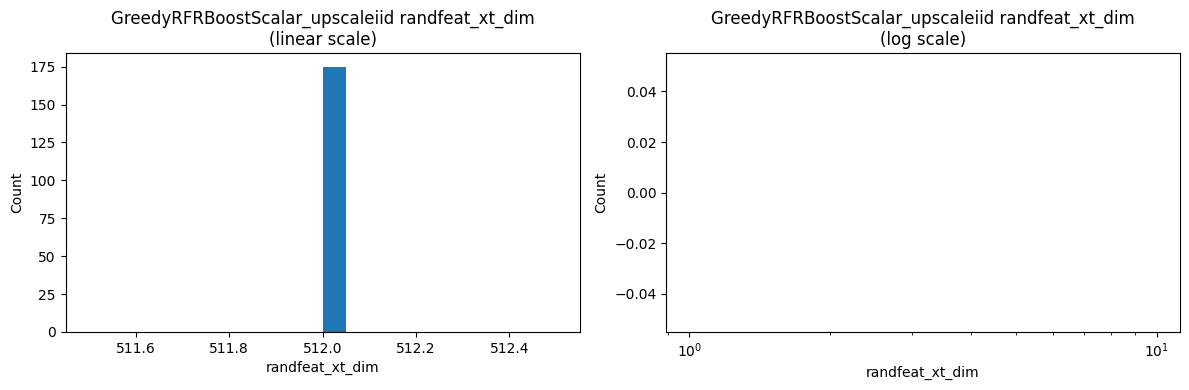

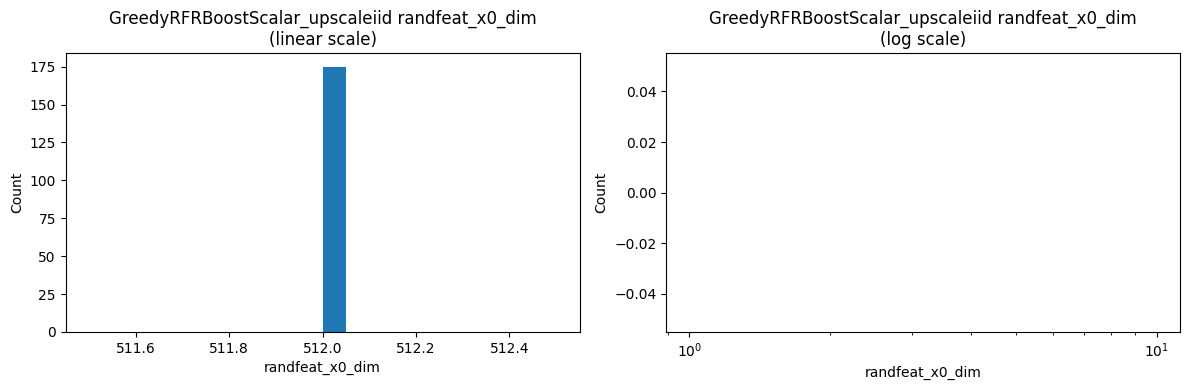

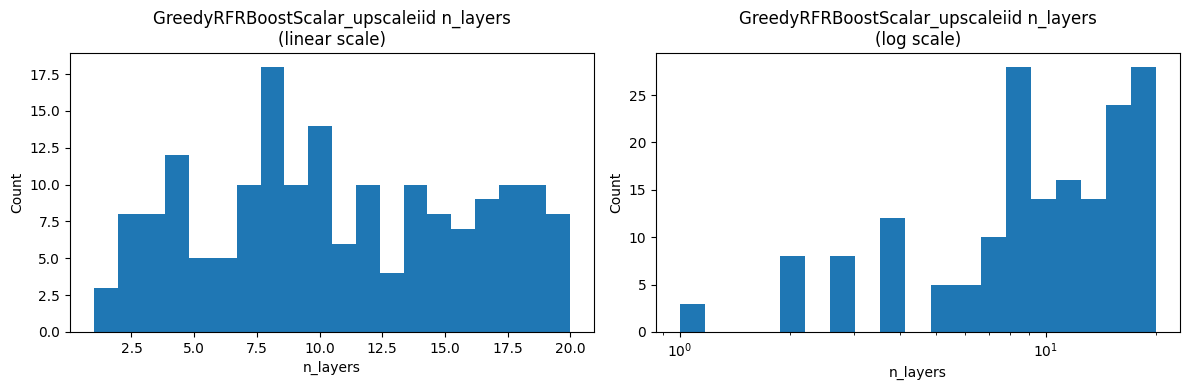

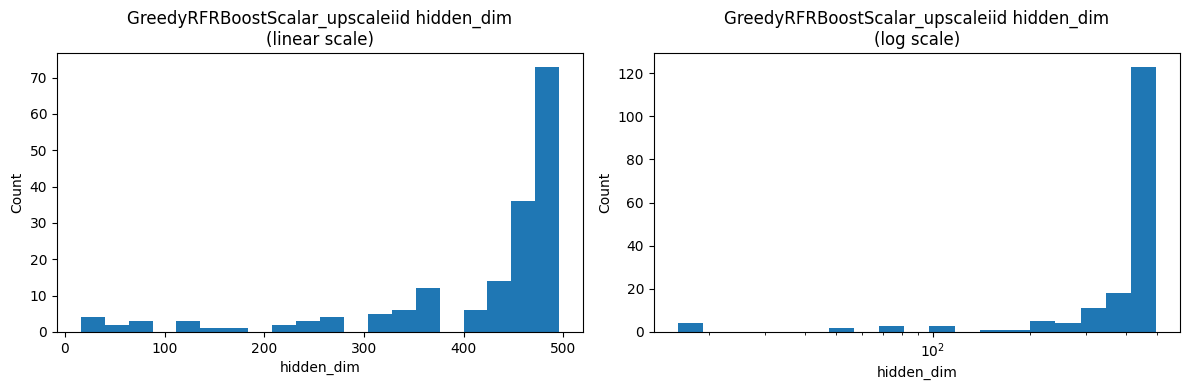

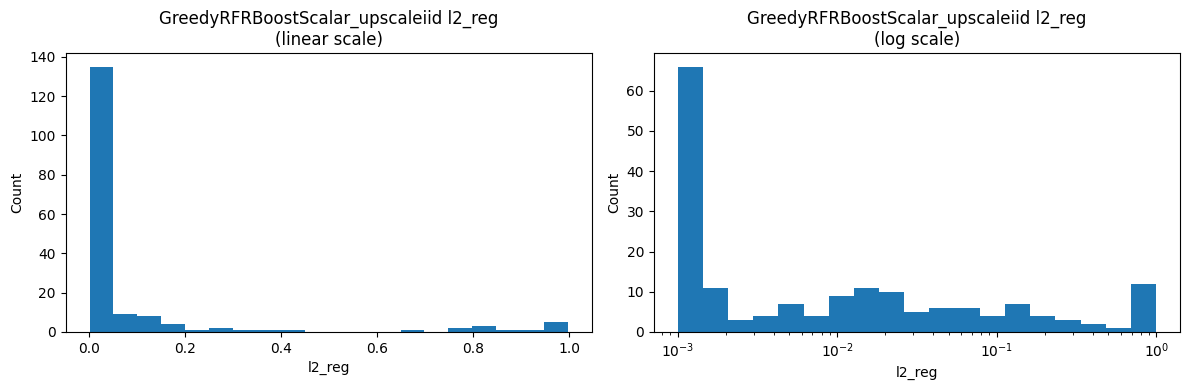

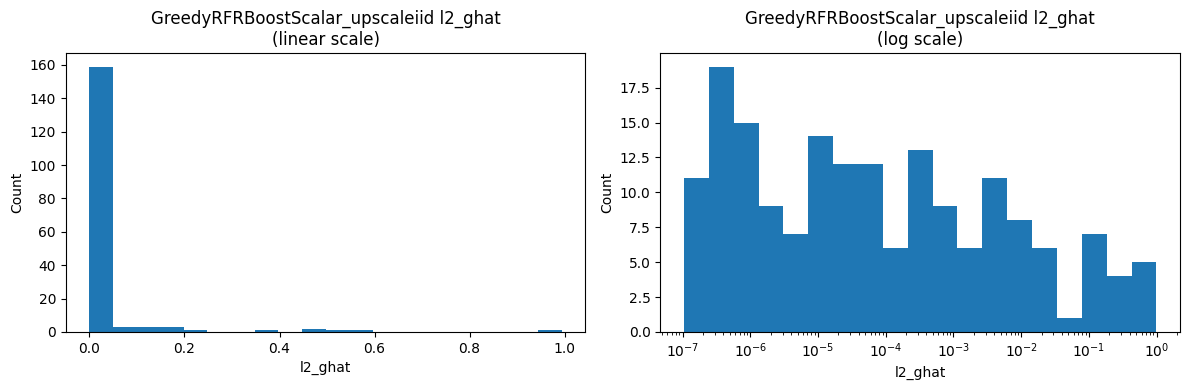

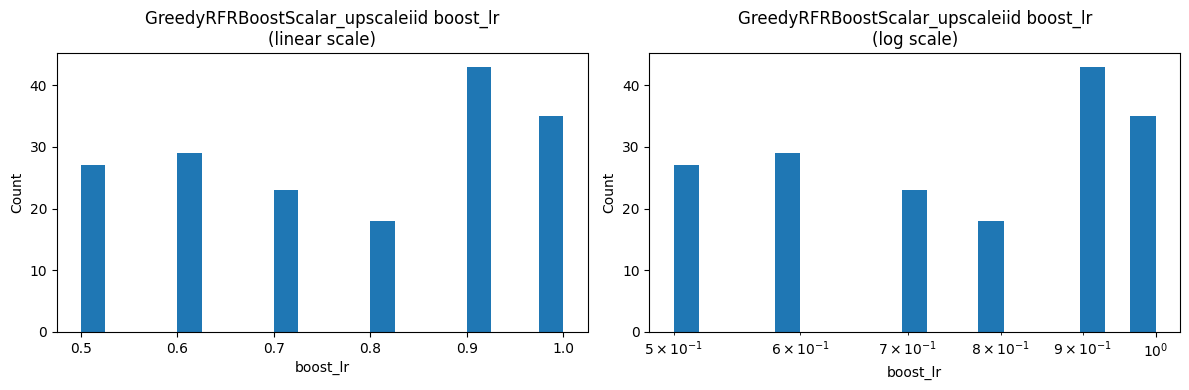

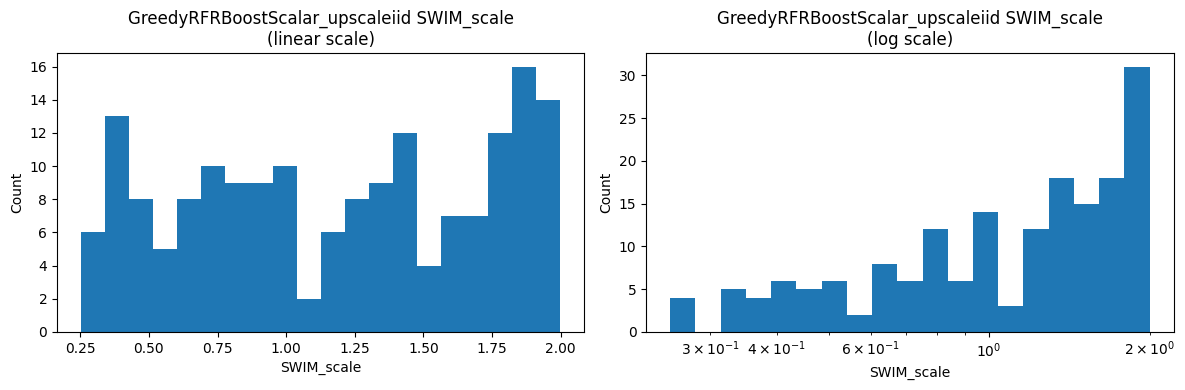

Model: RandomFeatureNetwork


/tmp/ipykernel_26127/1914130549.py:58: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min_val), np.log10(max_val), 20)
/home/nikita/Code/zephyrox/.conda/lib/python3.10/site-packages/numpy/core/function_base.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  delta = stop - start


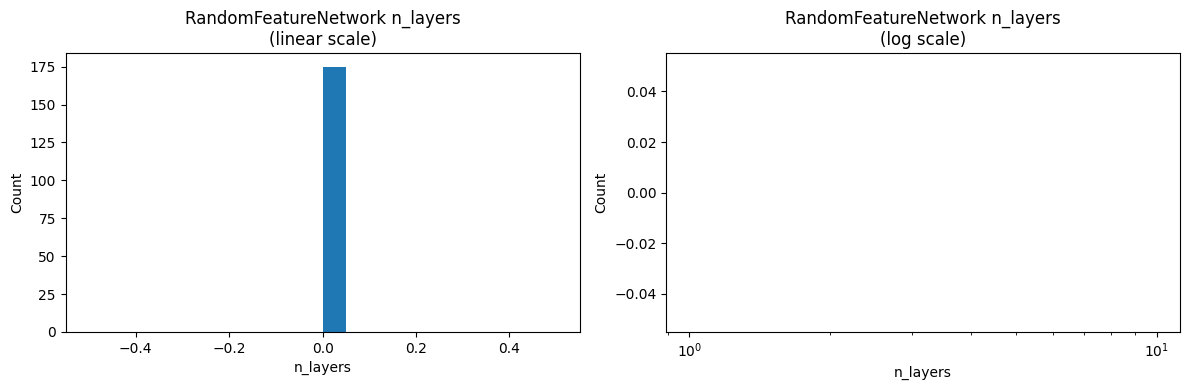

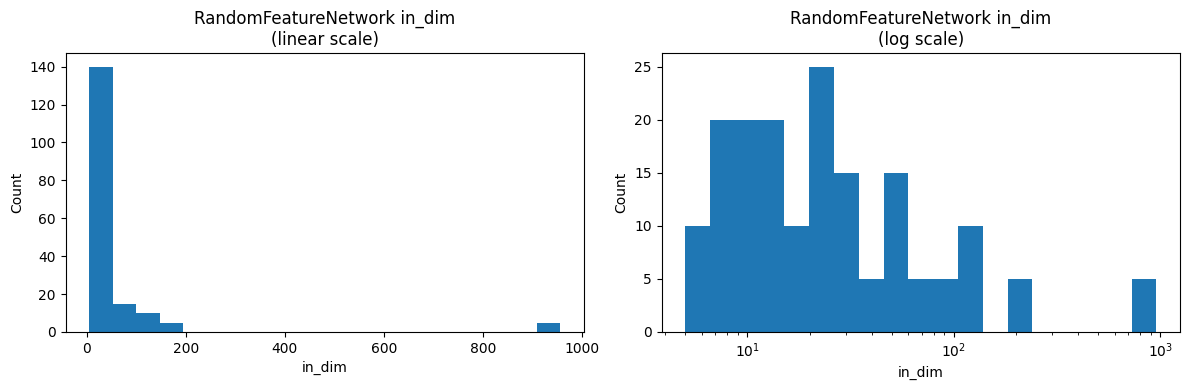

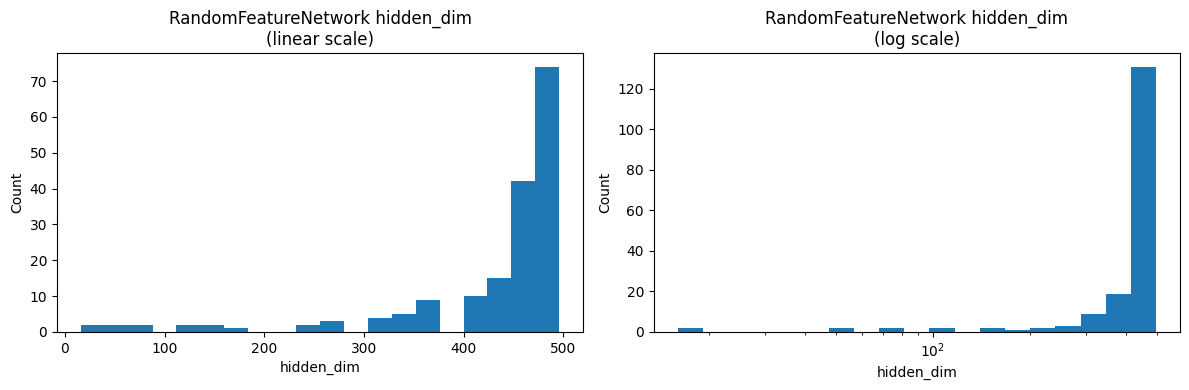

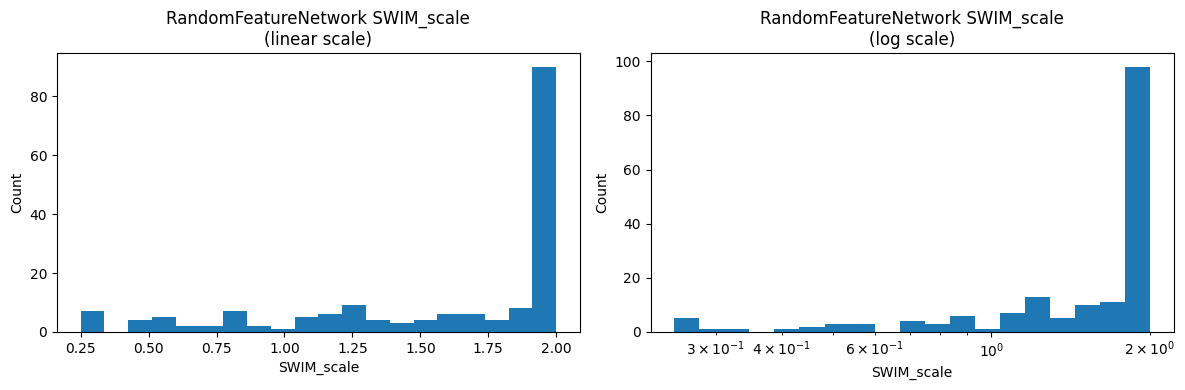

In [25]:
import matplotlib.pyplot as plt

def plot_param_distribution(
        models = ["End2End", "Ridge", "XGBoostRegressor", 
                  #"GradientRFRBoost", 
                  "GradientRFRBoostID", 
                  "GradientRFRBoost_upscaleiid",
                  #"GreedyRFRBoostDense", "GreedyRFRBoostDiag", "GreedyRFRBoostScalar",
                  "GreedyRFRBoostDense_upscaleiid", "GreedyRFRBoostDiag_upscaleiid", "GreedyRFRBoostScalar_upscaleiid",
                  "RandomFeatureNetwork",
                  #"RandomFeatureNetwork_iid",
                  #"GradientRFRBoost_upscaleiid_iidfeat", "GradientRFRBoostID_iidfeat", 
                  #"GreedyRFRBoostDense_upscaleiid_iidfeat", "GreedyRFRBoostDiag_upscaleiid_iidfeat", 
                  #"GreedyRFRBoostScalar_upscaleiid_iidfeat",
                  ],
        datasets = openML_reg_ids[:],
        save_dir = "/home/nikita/Code/random-feature-boosting/save/OpenMLRegression/",
        # save_dir = "/home/nikita/Code/random-feature-boosting/save/regv2_added40nlayers/OpenMLRegression/",
        ):
    # Load and join the JSON data
    results_json = get_joined_results_json(models, datasets, save_dir)

    # model: list_of_param_names
    modelwise_param_names = {model: list(results_json[str(datasets[0])][model]['hyperparams'][0])
                            for model in models} 

    # model: param_name: list_of_param_values
    param_distribution = { model: {param: [] for param in param_names}
                          for model, param_names in modelwise_param_names.items()}

    #populate teh param_districution nested dict
    for dataset, dataset_results in results_json.items():
        for model_name, model_results in dataset_results.items():
            for fold in model_results["hyperparams"]:
                for param_name, param_val in fold.items():
                    param_distribution[model_name][param_name].append(param_val)

    # For each model, plot the distribution of each parameter
    for model, param_dict in param_distribution.items():
        print(f"Model: {model}")
        for param_name, param_values in param_dict.items():
            if param_name not in [
                "out_dim", "loss", "objective", "feature_type",
                "upscale_type", "sandwich_solver"
                ]:
                # Create figure with two subplots side by side
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
                
                # Linear scale plot
                ax1.hist(param_values, bins=20)
                ax1.set_title(f"{model} {param_name}\n(linear scale)")
                ax1.set_xlabel(param_name)
                ax1.set_ylabel("Count")
                
                # Log scale plot
                min_val = np.min(param_values)  # Avoid log(0)
                max_val = np.max(param_values)
                bins = np.logspace(np.log10(min_val), np.log10(max_val), 20)
                ax2.hist(param_values, bins=bins)
                ax2.set_xscale('log')
                ax2.set_title(f"{model} {param_name}\n(log scale)")
                ax2.set_xlabel(param_name)
                ax2.set_ylabel("Count")
                
                plt.tight_layout()
                plt.show()

plot_param_distribution()

# Experiment on a given dataset

In [ ]:
from typing import Tuple, List, Union, Any, Optional, Dict, Literal, Callable, Type
import argparse

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor, tensor
import pandas as pd

from optuna_kfoldCV import evaluate_pytorch_model_kfoldcv, evaluate_dataset_with_model, pytorch_load_openml_dataset
from models.models import GreedyRFBoostRegressor, GreedyRFBoostRegressor_ScalarDiagDelta, GradientRFBoostRegressor
from regression_param_specs import evaluate_Ridge

from sklearn.model_selection import train_test_split

# X_all, y_all = pytorch_load_abalone()
device = "cuda"
X_all, y_all = pytorch_load_openml_dataset(44975, "regression", device)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# XGBoost:
from models.models import XGBoostRegressorWrapper, RidgeCVModule, End2EndMLPResNet

model = XGBoostRegressorWrapper(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.3,
)
model.fit(X_train, y_train)
y_pred_train = model(X_train)
y_pred_test = model(X_test)

print("XGBoost")
print(f"Train RMSE: {F.mse_loss(y_pred_train, y_train).sqrt()}")
print(f"Test RMSE {F.mse_loss(y_pred_test, y_test).sqrt()}")
print("\n")


# RidgeCV:
model = RidgeCVModule(
    lower_alpha=1e-6, upper_alpha=10, n_alphas=10
)
model.fit(X_train, y_train)
y_pred_train = model(X_train)
y_pred_test = model(X_test)

print("RidgeCV")
print(f"Train RMSE: {F.mse_loss(y_pred_train, y_train).sqrt()}")
print(f"Test RMSE {F.mse_loss(y_pred_test, y_test).sqrt()}")
print("\n")



In [ ]:
# End2EndMLPResNet:
model = End2EndMLPResNet(
    in_dim = X_train.shape[1],
    hidden_dim = X_train.shape[1],
    bottleneck_dim = 32,
    out_dim = 1,
    n_blocks = 4,
    lr = 0.1,
    end_lr_factor = 0.001,
    n_epochs = 20,
    weight_decay = 0.001,
    batch_size = 512
)
model.fit(X_train, y_train)
y_pred_train = model(X_train)
y_pred_test = model(X_test)

print("End2End")
print(f"Train RMSE: {F.mse_loss(y_pred_train, y_train).sqrt()}")
print(f"Test RMSE {F.mse_loss(y_pred_test, y_test).sqrt()}")
print("\n")

# Fit a model on a specific dataset

# GradientRFBoost

In [ ]:
from models.models import FittableModule, create_layer, Identity, fit_ridge_ALOOCV, sandwiched_LS_scalar


n_layers = 40
model = GradientRFBoostRegressor(
    hidden_dim = X_train.shape[1],
    randfeat_xt_dim = 512,
    randfeat_x0_dim = 512,
    n_layers = n_layers,
    feature_type = "SWIM",
    boost_lr = 1.0,
    upscale = "identity",
)
model.fit(X_train, y_train)
rmse_test = F.mse_loss(model(X_test), y_test).sqrt()
print(f"GradientRFBoostRegressor: {rmse_test}")

In [ ]:
def see_results_for_every_layer(X_train, X_test):
    with torch.no_grad():
        X0_train = X_train
        X0_test = X_test

        if model.upscale is not None:
            X_train = model.upscale_fun(X0_train)
            X_test = model.upscale_fun(X0_test)

        y_pred_train = X_train @ model.Ws[0] + model.bs[0]
        y_pred_test = X_test @ model.Ws[0] + model.bs[0]
        print(f"Train RMSE at layer 0: {F.mse_loss(y_pred_train, y_train).sqrt()}")
        print(f"Test RMSE at layer 0: {F.mse_loss(y_pred_test, y_test).sqrt()}")
        print()
        
        for t, (fxt_fun, fx0_fun, (Delta, Delta_b)) in enumerate(zip(model.layers_fxt, model.layers_fx0, model.deltas)):
            features_train = torch.cat([fxt_fun(X_train), fx0_fun(X0_train)], dim=1)
            features_test = torch.cat([fxt_fun(X_test), fx0_fun(X0_test)], dim=1)
            X_train = X_train + model.boost_lr * (features_train @ Delta + Delta_b)
            X_test = X_test + model.boost_lr * (features_test @ Delta + Delta_b)

            y_pred_train = X_train @ model.Ws[t+1] + model.bs[t+1]
            y_pred_test = X_test @ model.Ws[t+1] + model.bs[t+1]

            print(f"Train RMSE at layer {t+1}: {F.mse_loss(y_pred_train, y_train).sqrt()}")
            print(f"Test RMSE at layer {t+1}: {F.mse_loss(y_pred_test, y_test).sqrt()}")
            print()


see_results_for_every_layer(X_train, X_test)

In [ ]:
# slightly better test results by tuning l2_reg

# Dense sandwich

In [ ]:
n_layers = 40
model = GreedyRFBoostRegressor(
    hidden_dim = 100,
    randfeat_xt_dim = 256,
    randfeat_x0_dim = 256,
    n_layers = n_layers,
    feature_type = "SWIM",
    boost_lr = 0.9,
    upscale = "identity",
    l2_reg_sandwich = 0.00000001,
)
model.fit(X_train, y_train)

test_rmse = F.mse_loss(model(X_test), y_test).sqrt()
test_rmse

In [ ]:
def see_results_for_every_layer_greedy(X_train, X_test):
    with torch.no_grad():
        X0_train = X_train
        X0_test = X_test

        if model.upscale is not None:
            X_train = model.upscale_fun(X0_train)
            X_test = model.upscale_fun(X0_test)
        
        y_pred_train = X_train @ model.Ws[0] + model.bs[0]
        y_pred_test = X_test @ model.Ws[0] + model.bs[0]
        print(f"Train RMSE at layer 0: {F.mse_loss(y_pred_train, y_train).sqrt()}")
        print(f"Test RMSE at layer 0: {F.mse_loss(y_pred_test, y_test).sqrt()}")
        print()

        for t, (fxt_fun, fx0_fun, Delta) in enumerate(zip(model.layers_fxt, model.layers_fx0, model.deltas)):
            features_train = torch.cat([fxt_fun(X_train), fx0_fun(X0_train)], dim=1)
            features_test = torch.cat([fxt_fun(X_test), fx0_fun(X0_test)], dim=1)
            X_train = X_train + model.boost_lr * (features_train @ Delta)
            X_test = X_test + model.boost_lr * (features_test @ Delta)

            y_pred_train = X_train @ model.Ws[t+1] + model.bs[t+1]
            y_pred_test = X_test @ model.Ws[t+1] + model.bs[t+1]

            print(f"Train RMSE at layer {t+1}: {F.mse_loss(y_pred_train, y_train).sqrt()}")
            print(f"Test RMSE at layer {t+1}: {F.mse_loss(y_pred_test, y_test).sqrt()}")
            print()


see_results_for_every_layer_greedy(X_train, X_test)

# Diag sandwich

In [ ]:
n_layers = 40
model = GreedyRFBoostRegressor_ScalarDiagDelta(
    hidden_dim = 512,
    n_layers = n_layers,
    feature_type = "SWIM",
    boost_lr = 0.9,
    upscale = "dense",
    l2_reg_sandwich = 0.0000001,
    sandwich_solver="diag",
)
model.fit(X_train, y_train)

test_rmse = F.mse_loss(model(X_test), y_test).sqrt()
test_rmse

In [ ]:
def see_results_for_every_layer_diag_scalar(X_train, X_test):
    with torch.no_grad():
        X0_train = X_train
        X0_test = X_test

        if model.upscale is not None:
            X_train = model.upscale_fun(X0_train)
            X_test = model.upscale_fun(X0_test)

        y_pred_train = X_train @ model.Ws[0] + model.bs[0]
        y_pred_test = X_test @ model.Ws[0] + model.bs[0]
        print(f"Train RMSE at layer 0: {F.mse_loss(y_pred_train, y_train).sqrt()}")
        print(f"Test RMSE at layer 0: {F.mse_loss(y_pred_test, y_test).sqrt()}")
        print()

        for t, (layer, Delta) in enumerate(zip(model.layers, model.deltas)):
            features_train = layer(torch.cat([X_train, X0_train], dim=1))
            features_test = layer(torch.cat([X_test, X0_test], dim=1))
            X_train = X_train + model.boost_lr * model.XDelta_op(features_train, Delta)
            X_test = X_test + model.boost_lr * model.XDelta_op(features_test, Delta)

            y_pred_train = X_train @ model.Ws[t+1] + model.bs[t+1]
            y_pred_test = X_test @ model.Ws[t+1] + model.bs[t+1]

            print(f"Train RMSE at layer {t+1}: {F.mse_loss(y_pred_train, y_train).sqrt()}")
            print(f"Test RMSE at layer {t+1}: {F.mse_loss(y_pred_test, y_test).sqrt()}")
            print()


see_results_for_every_layer_diag_scalar(X_train, X_test)

# Scalar sandwich

In [ ]:
n_layers = 40
model = GreedyRFBoostRegressor_ScalarDiagDelta(
    hidden_dim = 512,
    n_layers = n_layers,
    feature_type = "SWIM",
    boost_lr = 0.9,
    upscale = "dense",
    l2_reg_sandwich = 0.000001,
    sandwich_solver="scalar",
)
model.fit(X_train, y_train)

test_rmse = F.mse_loss(model(X_test), y_test).sqrt()
print(test_rmse)


see_results_for_every_layer_diag_scalar(X_train, X_test)

In [ ]:
# XGBoosted randFeats --- better! (i hope also after tuning params)

# XGBoost:
from models.models import XGBoostRegressorWrapper, RidgeCVModule, End2EndMLPResNet
from models.models import FittableModule, create_layer, Identity, fit_ridge_ALOOCV, sandwiched_LS_scalar


n_layers = 20
model = GradientRFBoostRegressor(
    hidden_dim = X_train.shape[1],
    randfeat_xt_dim = 512,
    randfeat_x0_dim = 512,
    n_layers = n_layers,
    feature_type = "SWIM",
    boost_lr = 0.7,
    upscale = "identity",
)
model.fit(X_train, y_train)
rmse_test = F.mse_loss(model(X_test), y_test).sqrt()
print(f"GradientRFBoostRegressor: {rmse_test}")

def get_boosted_features(model, X_train, X_test):
    with torch.no_grad():
        X0_train = X_train
        X0_test = X_test

        if model.upscale is not None:
            X_train = model.upscale_fun(X0_train)
            X_test = model.upscale_fun(X0_test)

        y_pred_train = X_train @ model.Ws[0] + model.bs[0]
        y_pred_test = X_test @ model.Ws[0] + model.bs[0]
        print(f"Train RMSE at layer 0: {F.mse_loss(y_pred_train, y_train).sqrt()}")
        print(f"Test RMSE at layer 0: {F.mse_loss(y_pred_test, y_test).sqrt()}")
        print()
        
        for t, (fxt_fun, fx0_fun, (Delta, Delta_b)) in enumerate(zip(model.layers_fxt, model.layers_fx0, model.deltas)):
            features_train = torch.cat([fxt_fun(X_train), fx0_fun(X0_train)], dim=1)
            features_test = torch.cat([fxt_fun(X_test), fx0_fun(X0_test)], dim=1)
            X_train = X_train + model.boost_lr * (features_train @ Delta + Delta_b)
            X_test = X_test + model.boost_lr * (features_test @ Delta + Delta_b)

            y_pred_train = X_train @ model.Ws[t+1] + model.bs[t+1]
            y_pred_test = X_test @ model.Ws[t+1] + model.bs[t+1]

            print(f"Train RMSE at layer {t+1}: {F.mse_loss(y_pred_train, y_train).sqrt()}")
            print(f"Test RMSE at layer {t+1}: {F.mse_loss(y_pred_test, y_test).sqrt()}")
            print()
    return X_train, X_test

xgb = XGBoostRegressorWrapper(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.3,
)
boosted_features_train, boosted_features_test = get_boosted_features(model, X_train, X_test)
xgb.fit(boosted_features_train, y_train)
y_pred_train = xgb(boosted_features_train)
y_pred_test = xgb(boosted_features_test)

print("XGBoost")
print(f"Train RMSE: {F.mse_loss(y_pred_train, y_train).sqrt()}")
print(f"Test RMSE {F.mse_loss(y_pred_test, y_test).sqrt()}")
print("\n")